In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['figure.dpi'] = 300
from datetime import datetime, date
from matplotlib import ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [2]:
filePath = 'https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2021-2022/eedi/'

In [3]:
task3_4FilePath = filePath + 'task_3_4.csv.gz'
task3_4File = pd.read_csv(task3_4FilePath)
task3_4File

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [4]:
print(len(task3_4File))
t = task3_4File.dropna()
print(len(t))

1382727
1382727


In [5]:
# task3_4File
task3_4File = task3_4File.dropna()
task3_4Indexed = task3_4File.set_index('QuestionId')
task3_4Indexed

,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
QuestionId,,,,,
898,2111,280203,1,2,2
767,3062,55638,1,3,3
165,1156,386475,1,2,2
490,1653,997498,1,4,4
298,3912,578636,1,3,3
...,...,...,...,...,...
80,2608,57945,1,2,2
707,2549,584230,0,2,1
840,5901,1138956,1,1,1


In [6]:
subjectMetadataPath = filePath + 'subject_metadata.csv.gz'
subjectMetadataFile = pd.read_csv(subjectMetadataPath)
subjectMetadataFile = subjectMetadataFile.dropna()
subjectMetadataIndexed = subjectMetadataFile.set_index('SubjectId')
subjectMetadataIndexed

,Name,ParentId,Level
SubjectId,,,
32,Number,3.0,1
33,BIDMAS,144.0,3
34,Upper and Lower Bounds,141.0,3
35,Calculator Use,32.0,2
36,Decimals,32.0,2
...,...,...,...
1982,Mixed operation Fractions,39.0,3
1983,Drawing Axes,54.0,3
1985,Reading Scales,98.0,3


In [7]:
answerMetadataPath = filePath + 'answer_metadata_task_3_4.csv.gz'
answerMetadataFile = pd.read_csv(answerMetadataPath)
answerMetadataIndexed = answerMetadataFile.set_index('AnswerId')
answerMetadataIndexed

,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
AnswerId,,,,,
1451945,2019-10-30 14:34:00.000,NaN,4,32,52562.0
45325,2020-01-06 18:53:00.000,75.0,185,66,52562.0
687013,2020-01-18 10:52:00.000,NaN,235,64,52562.0
91254,2020-02-29 17:25:00.000,NaN,194,97,52562.0
1225855,2020-03-06 15:07:00.000,NaN,95,115,52562.0
...,...,...,...,...,...
880336,2019-12-05 18:56:00.000,75.0,27,84,52562.0
701366,2020-01-20 20:27:00.000,NaN,362,65,52562.0
646214,2019-12-17 19:33:00.000,NaN,170,84,52562.0


In [8]:
questionMetadataPath = filePath + 'question_metadata_task_3_4.csv.gz'
questionMetadataFile = pd.read_csv(questionMetadataPath)
questionMetadataFile = questionMetadataFile.dropna()
questionMetadataIndexed = questionMetadataFile.set_index('QuestionId')
questionMetadataIndexed

,SubjectId
QuestionId,
684,"[3, 71, 98, 209]"
87,"[3, 71, 98, 209]"
679,"[3, 71, 98, 209]"
685,"[3, 71, 98, 209]"
222,"[3, 71, 98, 209]"
...,...
313,"[3, 32, 39, 230]"
239,"[3, 32, 39, 230]"
397,"[3, 32, 39, 230]"


In [9]:
studentMetadataPath = filePath + 'student_metadata_task_3_4.csv.gz'
studentMetadataFile = pd.read_csv(studentMetadataPath)
# studentMetadataFile = studentMetadataFile.dropna()
studentMetadataIndexed = studentMetadataFile.set_index('UserId')
studentMetadataIndexed['DateOfBirth'] = pd.to_datetime(studentMetadataIndexed['DateOfBirth']).dt.date
today = datetime.today()
studentMetadataIndexed['Age'] = studentMetadataIndexed['DateOfBirth'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )
studentMetadataIndexed

,Gender,DateOfBirth,PremiumPupil,Age
UserId,,,,
3837,2,2007-10-01,0.0,14.0
207,0,NaT,NaN,NaN
3581,2,2008-03-01,0.0,14.0
6028,2,2008-01-01,0.0,14.0
1451,0,NaT,NaN,NaN
...,...,...,...,...
5831,0,NaT,NaN,NaN
3165,2,2008-01-01,0.0,14.0
273,2,NaT,NaN,NaN


In [10]:
studentMetadataFile['Gender'].value_counts()

0    2372
2    1884
1    1880
3      12
Name: Gender, dtype: int64

In [11]:
# merging: studentMetaFile, answerMetaFile & task 3_4


In [12]:
def getAnsweredPercent(subjectCode):
    totalAnswers = len(task3_4File.loc[(task3_4File['QuestionId'] == subjectCode)])
    noOfCorrect = len(task3_4File.loc[(task3_4File['QuestionId'] == subjectCode) & (task3_4File['IsCorrect'] == 1)])
    return (noOfCorrect/totalAnswers)

In [13]:
questionMetadataFile['CorrectProportion'] = questionMetadataFile['QuestionId'].apply(lambda x : getAnsweredPercent(x))
questionMetadataFile

,QuestionId,SubjectId,CorrectProportion
0,684,"[3, 71, 98, 209]",0.304403
1,87,"[3, 71, 98, 209]",0.286176
2,679,"[3, 71, 98, 209]",0.857697
3,685,"[3, 71, 98, 209]",0.602865
4,222,"[3, 71, 98, 209]",0.601316
...,...,...,...
943,313,"[3, 32, 39, 230]",0.444444
944,239,"[3, 32, 39, 230]",0.555556
945,397,"[3, 32, 39, 230]",0.416667
946,897,"[3, 32, 39, 230]",0.444444


In [14]:
# def getAccuracyFromConfidence(confidence):
#     totalAnswers = len(answerMetadataFile.loc[(answerMetadataFile['Confidence'] == confidence)])
#     noOfCorrect = len(answerMetadataFile.loc[(answerMetadataFile['Confidence'] == confidence) & (task3_4File['IsCorrect'] == 1)])
#     return (noOfCorrect/totalAnswers)\

# def getAccuracy(answerId):
#     task3_4File.loc[task3_4File['AnswerId'] == answerId, 'CorrectAnswer'].iloc[0]
# answerMetadataFile['IsCorrect'] = answerMetadataFile['AnswerId'].apply(lambda x : getAccuracy(x))

answercorr_df = task3_4File[['AnswerId','IsCorrect']]
answercorr_df = answercorr_df.dropna()
mergedAnswerMeta = (answerMetadataFile.dropna()).merge(answercorr_df, on ='AnswerId', how ='inner')
# answerMetadataFile
# answercorr_df.loc[answercorr_df['AnswerId'] == 45325]
# task3_4File.loc[task3_4File['AnswerId'] == 45325]
mergedAnswerMeta

,AnswerId,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,IsCorrect
0,45325,2020-01-06 18:53:00.000,75.0,185,66,52562.0,0
1,1035712,2019-10-06 11:38:00.000,100.0,331,18,52562.0,1
2,440693,2019-09-26 19:05:00.000,0.0,93,39,52562.0,1
3,965266,2019-12-05 12:05:00.000,75.0,163,25,52562.0,1
4,709175,2019-11-25 20:14:00.000,75.0,350,65,52562.0,1
...,...,...,...,...,...,...,...
334933,639913,2019-11-29 17:51:00.000,50.0,201,46,52562.0,0
334934,1144974,2019-11-27 21:28:00.000,50.0,166,46,52562.0,1
334935,562652,2019-12-16 18:12:00.000,100.0,332,25,52562.0,0
334936,880336,2019-12-05 18:56:00.000,75.0,27,84,52562.0,0


In [15]:
confidence_data = [[0.0, 0, 0, 0], [25.0, 0, 0, 0], [50.0, 0, 0, 0], [75.0, 0, 0, 0], [100.0, 0, 0, 0]]
confidence_df = pd.DataFrame(confidence_data, columns = ['Confidence', 'No. of Submissions', 'No. Correct', 'Accuracy' ])
confidence_df

,Confidence,No. of Submissions,No. Correct,Accuracy
0,0.0,0,0,0
1,25.0,0,0,0
2,50.0,0,0,0
3,75.0,0,0,0
4,100.0,0,0,0


In [16]:
k = 0
for i in (0.0,25.0,50.0,75.0,100.0):
    noSubmissions = len(mergedAnswerMeta.loc[(mergedAnswerMeta['Confidence'] == i)])
    noCorrect = len(mergedAnswerMeta.loc[(mergedAnswerMeta['Confidence'] == i) & (mergedAnswerMeta['IsCorrect'] == 1)])
    # confidence_df.at[k, 'No.Incorrect'] =
    print(noSubmissions)
    confidence_df.at[k, 'No. of Submissions'] = noSubmissions
    confidence_df.at[k, 'No. Correct'] = noCorrect
    confidence_df.at[k, 'Accuracy'] = ((noCorrect/noSubmissions) * 100)
    k+=1

27999
16981
51450
85074
153434


In [17]:
confidence_df

,Confidence,No. of Submissions,No. Correct,Accuracy
0,0.0,27999,9283,33
1,25.0,16981,6515,38
2,50.0,51450,24677,47
3,75.0,85074,54582,64
4,100.0,153434,111798,72


In [18]:
27999 - 16981

11018

<ipython-input-19-b38458129faf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


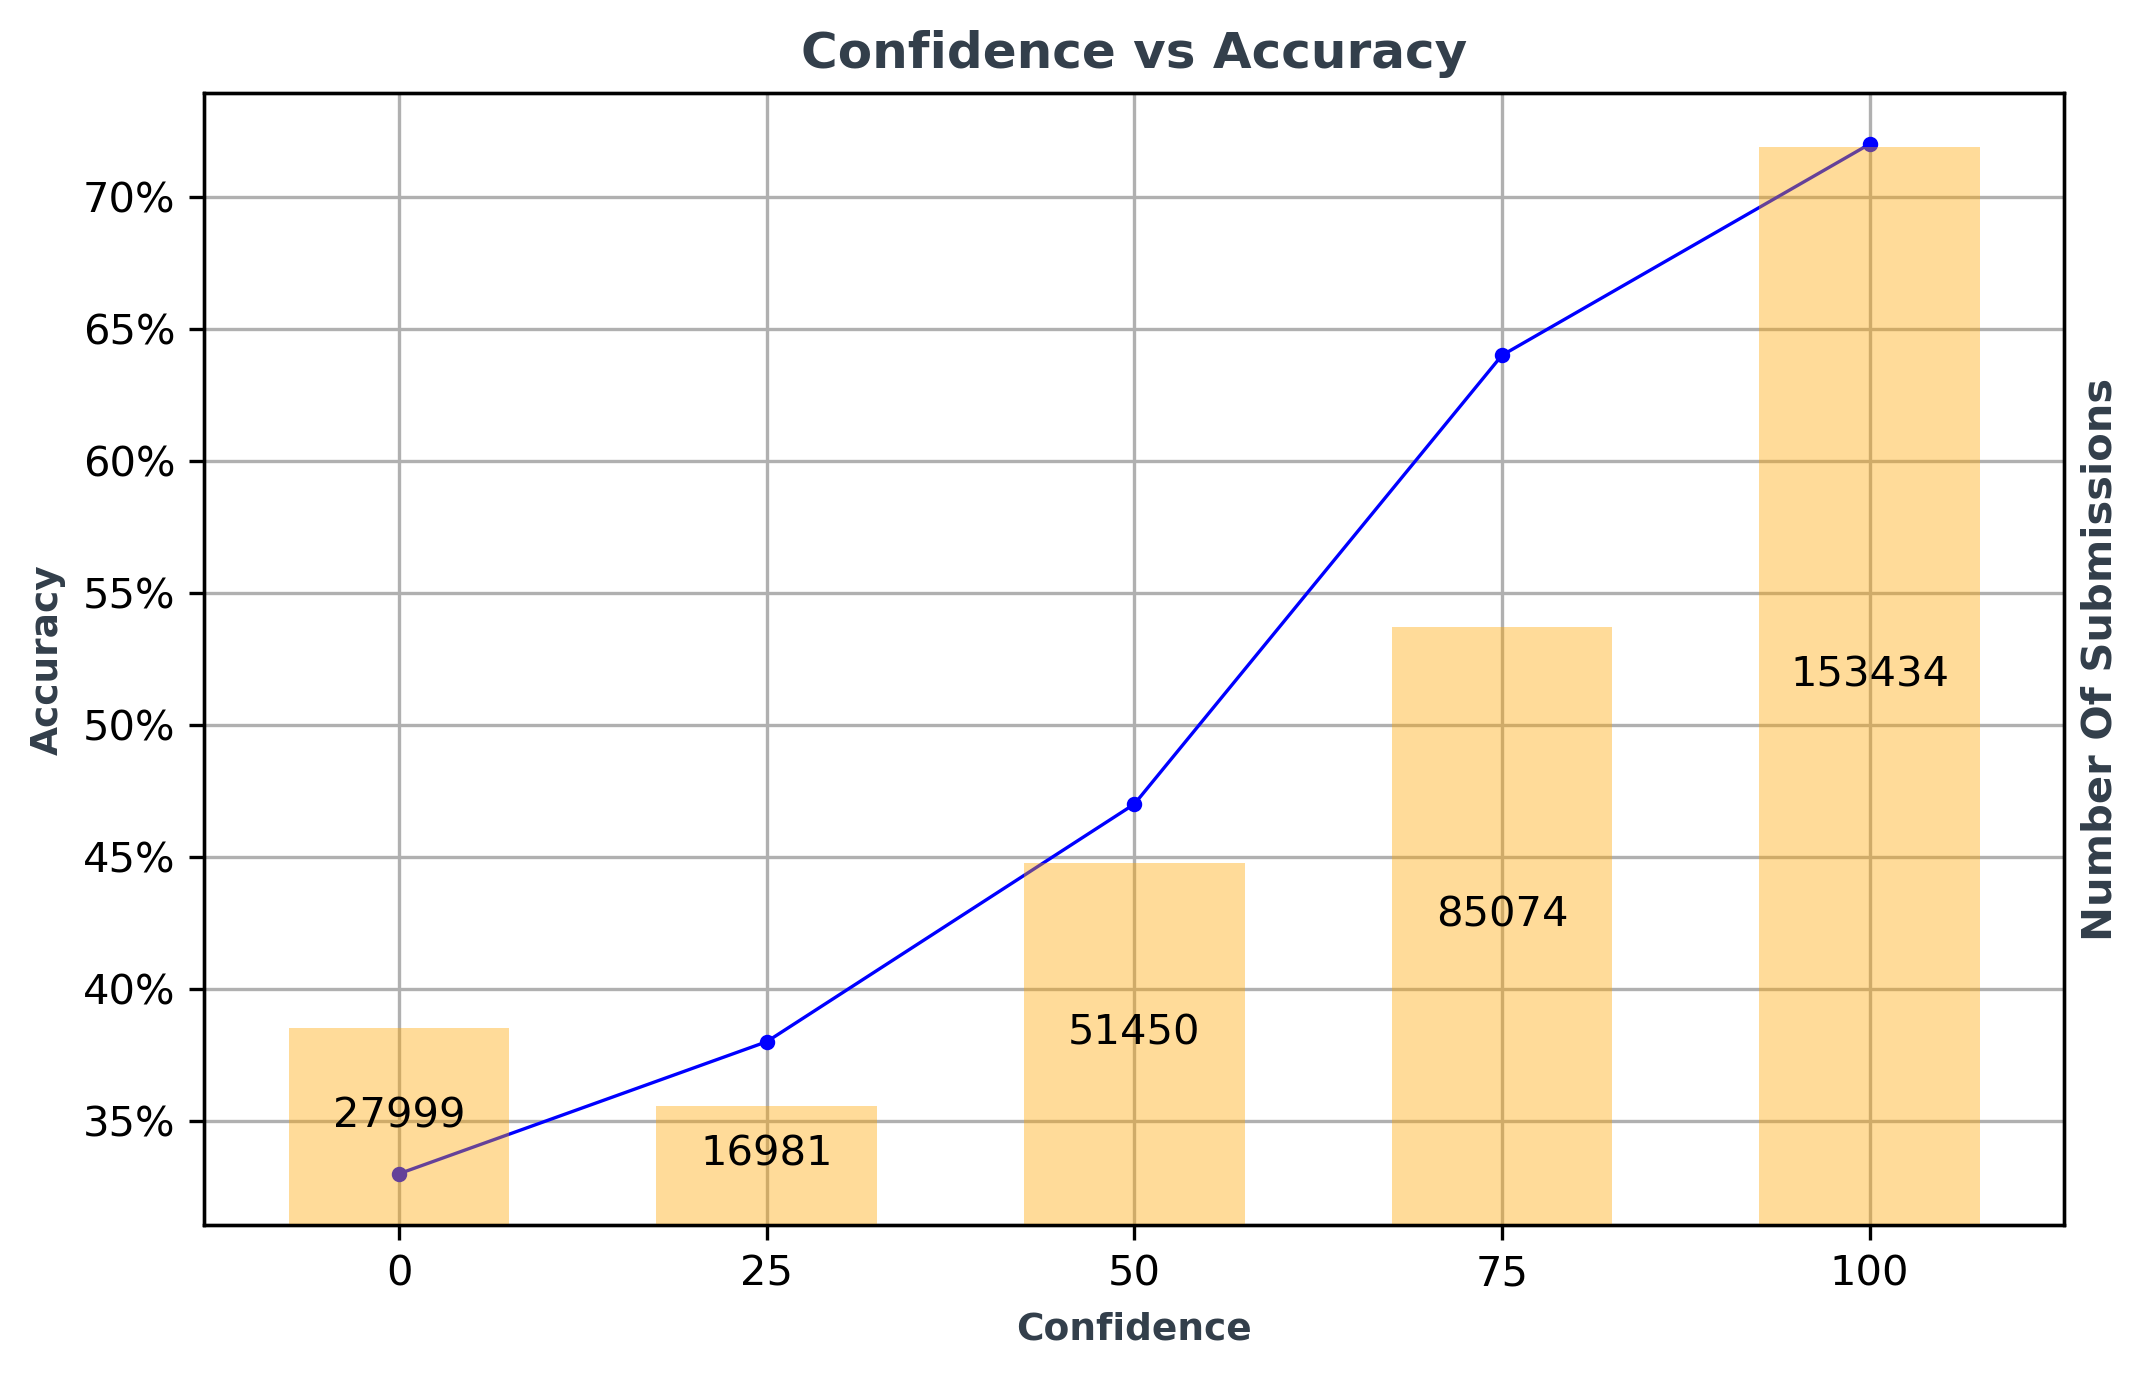

In [19]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(confidence_df['Confidence'], confidence_df['Accuracy'], color='blue', linewidth = 0.8, marker="o", markeredgecolor='blue' ,markersize =2.7)
ax.set_title('Confidence vs Accuracy', fontweight='black', color = '#333F4B')
ax.set_ylabel('Accuracy', fontsize= 9 , fontweight='black', color = '#333F4B')
ax.set_xlabel('Confidence', fontsize= 9 , fontweight='black', color = '#333F4B')
y_value=['{:,.0f}'.format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax2 = ax.twinx()
ax2.bar(confidence_df['Confidence'], confidence_df['No. of Submissions'], width=15, color = 'orange', alpha = 0.4)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i]//2, y[i], ha = 'center')

addlabels(confidence_df['Confidence'], confidence_df['No. of Submissions'])
ax2.set_ylabel('Number Of Submissions', fontsize=10, fontweight='black', color = '#333F4B')
ax2.yaxis.set_major_locator(ticker.NullLocator())
x1 = confidence_df['Confidence']
plt.xticks(x1)
ax.grid()
plt.show()

In [20]:
# studentMetadataIndexed = studentMetadataIndexed.groupby(['Age'],as_index=False).mean()
# studentMetadataIndexed['CorrectProportion'] = studentMetadataIndexed['Age'].apply(lambda x : getAnsweredPercent(x))
# fig, (ax1) = plt.subplots(figsize=(7, 3))
# ax1.plot(studentMetadataIndexed['Age'],studentMetadataIndexed['CorrectProportion'], 'b')
# ax1.set_xlabel('Age (Year)')
# ax1.set_ylabel('Accuracy')
# ax1.set_title('Age vs. Accuracy')
# ax1.grid()

In [21]:
# QUESTION 4:
# Q> What is the affect on performance based on the QuizID

In [22]:
t = datetime(2019,12,9)
# There are 237 unique dates; so the viz might be a bit convulated when trying to accomodate for each date.
# answerMetadataFile.loc[answerMetadataFile['QuizId'] == 5]
# df = pd.to_datetime(answerMetadataFile['DateAnswered'])
answerMetadataFile['DateAnswered']=pd.to_datetime(answerMetadataFile['DateAnswered']).dt.date
# answerMetadataFile
# answerMetadataFile.loc[answerMetadataFile['DateAnswered'] == t.date()]
print(answerMetadataFile['DateAnswered'].value_counts())
# answerMetadataFile.loc
# different dates have the same quizid
# answerMetadataFile.loc[answerMetadataFile['QuizId'] == 66]
# type(answerMetadataFile['DateAnswered'].iloc[0])

2020-01-07    16464
2019-12-03    15642
2019-12-02    15384
2019-11-26    14969
2019-12-11    14760
              ...  
2019-09-10       42
2019-09-07       42
2019-09-11       28
2020-04-30       15
2019-09-09       14
Name: DateAnswered, Length: 239, dtype: int64


In [23]:
mergedAnswerFile = task3_4File.merge(answerMetadataFile, how = 'left', on = 'AnswerId')
mergedAnswerFile = mergedAnswerFile[mergedAnswerFile['QuizId'].notna()]
print(len(mergedAnswerFile))
mergedAnswerFile = mergedAnswerFile[mergedAnswerFile['Confidence'].notna()]
print(len(mergedAnswerFile))
mergedAnswerFile

1382727
346428


,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
1,767,3062,55638,1,3,3,2019-10-27,25.0,115,39,52562.0
6,932,3923,6545,0,4,3,2019-10-02,25.0,112,57,52562.0
12,405,1506,1268566,1,2,2,2019-12-19,100.0,210,64,52562.0
13,78,944,85177,1,3,3,2020-01-27,100.0,53,30,NaN
16,11,5482,648990,0,2,3,2019-11-24,50.0,95,109,52562.0
...,...,...,...,...,...,...,...,...,...,...,...
1382705,222,1048,185768,0,4,3,2019-10-08,50.0,260,18,52562.0
1382707,596,5579,387573,0,2,1,2019-10-23,25.0,288,32,52562.0
1382709,276,2213,884965,0,4,3,2019-11-26,25.0,360,62,52562.0
1382712,300,4605,802606,0,4,3,2019-12-01,100.0,24,25,52562.0


In [24]:
def getAccuracyPercentForQuizId(quizID):
    totSubmissions = len(mergedAnswerFile.loc[(mergedAnswerFile['QuizId'] == quizID)])
    noOfCorrect = len(mergedAnswerFile.loc[(mergedAnswerFile['QuizId'] == quizID) & (mergedAnswerFile['IsCorrect'] == 1)])
    accuracy = (noOfCorrect / totSubmissions) * 100
    avgConfidence =  mergedAnswerFile.loc[(mergedAnswerFile['QuizId']== quizID)]['Confidence'].mean()
    return (totSubmissions, accuracy, avgConfidence)

In [25]:
quizIdList = mergedAnswerFile['QuizId'].unique()
quizIdList.sort()
print(quizIdList)

[  2   3   4   5   6   7   8   9  10  12  16  17  18  19  20  24  25  30
  32  33  34  36  37  39  41  42  43  46  47  49  50  51  53  55  56  57
  58  59  60  61  62  63  64  65  66  68  70  72  73  75  76  77  78  79
  83  84  85  86  87  88  91  92  93  95  97  98 101 103 105 107 109 111
 112 113 114 115 117 118 119]


In [26]:
# quizlist = [(x,getAnsweredPercentForQuizId(x)) for x in quizIdList]
# quizlist
# quizDf = pd.DataFrame(quizlist, columns = ['QuizID', 'Accuracy-%' ])
# quizDf

In [27]:
# fig, ax = plt.subplots(figsize=(5, 3))
# ax.scatter(quizDf['QuizID'], quizDf['Accuracy-%'], c= 'orange', s = 0.5, alpha=0.75)
# # ax.plot(quizDf['QuizID'], quizDf['Accuracy-%'], c = 'orange', linewidth = 0.3,  linestyle = 'dashed', marker="o", markerfacecolor='blue',markersize=1 )
# # ax.plot(quizDf['QuizID'], quizDf['Accuracy-%'], color='blue', linewidth = 0.3, marker="o", markeredgecolor='orange' ,markersize =1, markerfacecolor='red', linestyle = 'dashed')
# ax.set_title('Accuracy % vs QuizID')
# ax.set_ylabel('Accuracy %')
# ax.set_xlabel('QuizID')
# plt.show()

In [28]:
def getNoSubmissionsQuiz(quizID):
    return len(mergedAnswerFile.loc[mergedAnswerFile['QuizId'] == quizID])

In [29]:
quizlist = [(x,getAccuracyPercentForQuizId(x)[1], getAccuracyPercentForQuizId(x)[0], getAccuracyPercentForQuizId(x)[2]) for x in quizIdList]
quizDf = pd.DataFrame(quizlist, columns = ['QuizID', 'Accuracy-%', 'No. Of Submissions', 'Avg.Confidence' ])
quizDf

,QuizID,Accuracy-%,No. Of Submissions,Avg.Confidence
0,2,56.985294,272,77.941176
1,3,64.394619,1115,75.044843
2,4,100.000000,1,100.000000
3,5,50.125993,10318,68.770595
4,6,58.805906,4673,74.251016
...,...,...,...,...
74,114,51.156069,346,70.520231
75,115,61.846352,3098,76.162040
76,117,60.059172,338,76.701183
77,118,63.607595,316,77.610759


<ipython-input-30-887a3bb76092>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


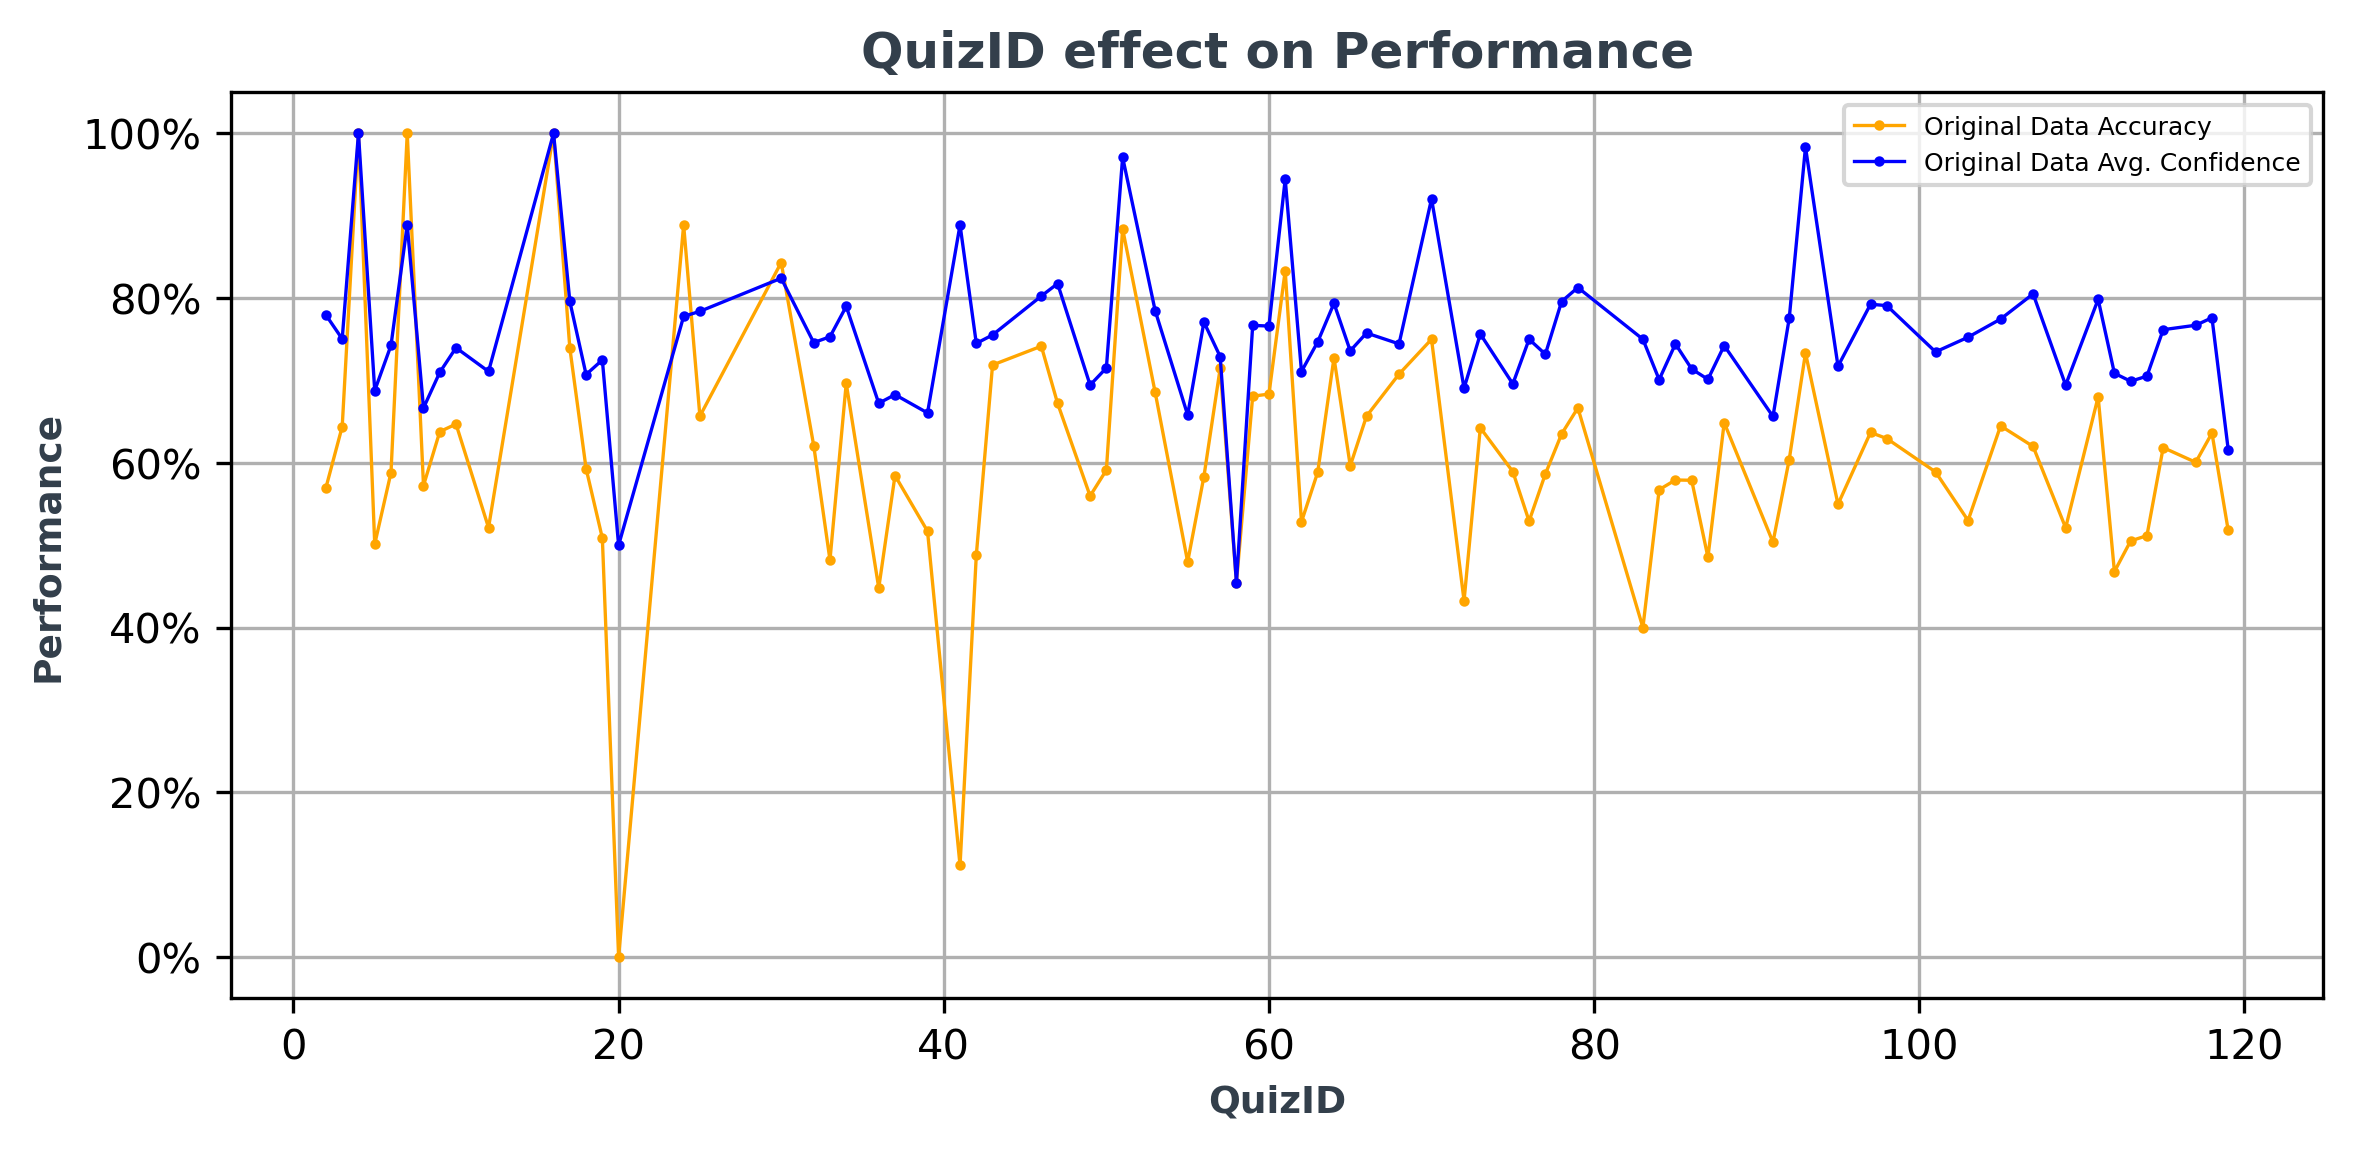

In [30]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(quizDf['QuizID'], quizDf['Accuracy-%'], color='orange', linewidth = 0.8, marker="o", markeredgecolor='orange' ,markersize =1.5, label="Original Data Accuracy")
ax.plot(quizDf['QuizID'], quizDf['Avg.Confidence'], color='blue', linewidth = 0.8, marker="o", markeredgecolor='blue' ,markersize =1.5, label="Original Data Avg. Confidence")
ax.set_title('QuizID effect on Performance', fontweight='black', color = '#333F4B')
ax.set_ylabel('Performance', fontsize= 9 , fontweight='black', color = '#333F4B')
ax.set_xlabel('QuizID', fontsize= 9 , fontweight='black', color = '#333F4B')
y_value=['{:,.0f}'.format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(y_value)
plt.legend(fontsize = '6')
plt.grid()
plt.show()

In [31]:
subjectFile = pd.read_csv(subjectMetadataPath)
# subjectFile = subjectFile.set_index('SubjectId')
subjectFile

,SubjectId,Name,ParentId,Level
0,3,Maths,NaN,0
1,32,Number,3.0,1
2,33,BIDMAS,144.0,3
3,34,Upper and Lower Bounds,141.0,3
4,35,Calculator Use,32.0,2
...,...,...,...,...
383,1982,Mixed operation Fractions,39.0,3
384,1983,Drawing Axes,54.0,3
385,1985,Reading Scales,98.0,3
386,1987,Sorting Shapes,174.0,3


In [32]:
subjectFile.loc[subjectFile['SubjectId'] == 81]

,SubjectId,Name,ParentId,Level
49,81,Co-ordinates,49.0,2


In [33]:
s = '[3, 71, 98, 209]'
l = s

In [34]:
def convertToList(s):
    l = s.strip('][').split(', ')
    list = [int(x) for x in l]
    return list

In [35]:
qFile = pd.read_csv(questionMetadataPath)
qFile['SubjectId'] = qFile['SubjectId'].apply(lambda x: convertToList(x))
# qFile['id1'] = qFile['SubjectId'].apply(lambda x : x[0])
# qFile['id2'] = qFile['SubjectId'].apply(lambda x : x[1])
qFile['id2'] = qFile['SubjectId'].apply(lambda x : x[2])
qFile['id3'] = qFile['SubjectId'].apply(lambda x : x[3])
qFile

,QuestionId,SubjectId,id2,id3
0,684,"[3, 71, 98, 209]",98,209
1,87,"[3, 71, 98, 209]",98,209
2,679,"[3, 71, 98, 209]",98,209
3,685,"[3, 71, 98, 209]",98,209
4,222,"[3, 71, 98, 209]",98,209
...,...,...,...,...
943,313,"[3, 32, 39, 230]",39,230
944,239,"[3, 32, 39, 230]",39,230
945,397,"[3, 32, 39, 230]",39,230
946,897,"[3, 32, 39, 230]",39,230


In [36]:
qlist = list(qFile['QuestionId'])
qlist

[684,
 87,
 679,
 685,
 222,
 798,
 26,
 581,
 491,
 880,
 594,
 546,
 706,
 55,
 182,
 202,
 420,
 403,
 691,
 503,
 261,
 566,
 289,
 326,
 241,
 72,
 674,
 226,
 790,
 659,
 825,
 25,
 804,
 601,
 464,
 473,
 932,
 751,
 292,
 506,
 472,
 830,
 644,
 924,
 519,
 889,
 285,
 410,
 480,
 640,
 629,
 522,
 53,
 803,
 767,
 212,
 475,
 92,
 787,
 154,
 169,
 304,
 165,
 615,
 624,
 735,
 93,
 373,
 627,
 513,
 617,
 346,
 86,
 486,
 805,
 574,
 744,
 197,
 653,
 338,
 19,
 881,
 912,
 446,
 438,
 943,
 525,
 887,
 596,
 819,
 448,
 583,
 290,
 749,
 939,
 283,
 592,
 293,
 69,
 614,
 587,
 233,
 745,
 40,
 199,
 911,
 764,
 405,
 252,
 547,
 922,
 332,
 50,
 178,
 460,
 867,
 529,
 143,
 639,
 676,
 736,
 599,
 809,
 941,
 209,
 185,
 635,
 463,
 813,
 786,
 638,
 3,
 134,
 938,
 527,
 337,
 311,
 637,
 372,
 45,
 754,
 461,
 650,
 314,
 678,
 646,
 833,
 238,
 788,
 500,
 276,
 242,
 46,
 457,
 71,
 161,
 177,
 278,
 80,
 738,
 831,
 234,
 111,
 183,
 926,
 360,
 605,
 623,
 769,
 282,

In [37]:
t3_4 = pd.read_csv(task3_4FilePath)
mergedDf = answerMetadataFile.merge(task3_4File, how = 'left', on = 'AnswerId')
answerDropConfidenceNaN = mergedDf.dropna()
answerDropConfidenceNaN

,AnswerId,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,QuestionId,UserId,IsCorrect,CorrectAnswer,AnswerValue
1,45325,2020-01-06,75.0,185,66,52562.0,840.0,1559.0,0.0,1.0,4.0
6,1035712,2019-10-06,100.0,331,18,52562.0,55.0,1605.0,1.0,4.0,4.0
8,440693,2019-09-26,0.0,93,39,52562.0,212.0,4340.0,1.0,4.0,4.0
11,965266,2019-12-05,75.0,163,25,52562.0,76.0,565.0,1.0,2.0,2.0
21,709175,2019-11-25,75.0,350,65,52562.0,769.0,3829.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1508888,639913,2019-11-29,50.0,201,46,52562.0,941.0,1308.0,0.0,4.0,2.0
1508896,1144974,2019-11-27,50.0,166,46,52562.0,637.0,5725.0,1.0,2.0,2.0
1508907,562652,2019-12-16,100.0,332,25,52562.0,27.0,3166.0,0.0,1.0,2.0
1508912,880336,2019-12-05,75.0,27,84,52562.0,371.0,5451.0,0.0,1.0,2.0


In [38]:
def getAccConfQues(slist):
    acc = 0
    avgConf = 0
    count = 0
    noSub = 0
    for id in slist:
        totsubmissions = len(answerDropConfidenceNaN.loc[answerDropConfidenceNaN['QuestionId'] == id])
        noSub = noSub + totsubmissions
        noOfCorrect = len(answerDropConfidenceNaN.loc[(answerDropConfidenceNaN['QuestionId'] == id) & (answerDropConfidenceNaN['IsCorrect'] == 1)])
        # accuracy = (noOfCorrect / totSubmissions) * 100
        acc = acc + noOfCorrect
        if totsubmissions != 0:
            avgConf= avgConf + answerDropConfidenceNaN.loc[(answerDropConfidenceNaN['QuestionId']== id)]['Confidence'].mean()
            count = count + 1
    if (noSub != 0 | count != 0):
        accuracy = acc/noSub
        avgConfidence = avgConf / count
        return (accuracy, avgConfidence)
    return (-1,-1)

In [39]:
def getQuestionAcc(subjectId):
    t = qFile.loc[(qFile['id2'] == subjectId) | (qFile['id3'] == subjectId)]
    l = list(t['QuestionId'])
    if len(l) != 0:
        return getAccConfQues(l)
    return (-1,-1)

In [40]:
levelToCheckSubjects = subjectFile.loc[subjectFile['Level'] == 2]
levelToCheckSubjectsList = list(levelToCheckSubjects['SubjectId'])
len(levelToCheckSubjectsList)

69

In [41]:
subjectList = [(x, (getQuestionAcc(x)[0] * 100), (subjectMetadataIndexed.at[x,'Name']), getQuestionAcc(x)[1]) for x in levelToCheckSubjectsList]
subjectDf =  pd.DataFrame(subjectList, columns = ['QuestionId', 'Accuracy%','Name', 'Avg. Confidence'])
subjectDf = subjectDf.loc[subjectDf['Accuracy%'] != -100]
subjectDf = subjectDf[subjectDf['Avg. Confidence'].notna()]
subjectDf

,QuestionId,Accuracy%,Name,Avg. Confidence
1,36,54.000000,Decimals,81.977831
2,37,64.980499,"Factors, Multiples and Primes",75.466632
3,38,62.941176,"Fractions, Decimals and Percentage Equivalence",75.938876
4,39,57.616248,Fractions,77.364665
5,40,71.856615,"Indices, Powers and Roots",75.350966
6,42,62.018329,Negative Numbers,73.978128
11,54,46.168461,Straight Line Graphs,64.655062
13,59,59.331286,Inequalities,71.735154
14,61,65.979381,Sequences,71.662917
15,62,61.959667,Writing and Simplifying Expressions,71.473608


<ipython-input-42-da8f4048e451>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_value)


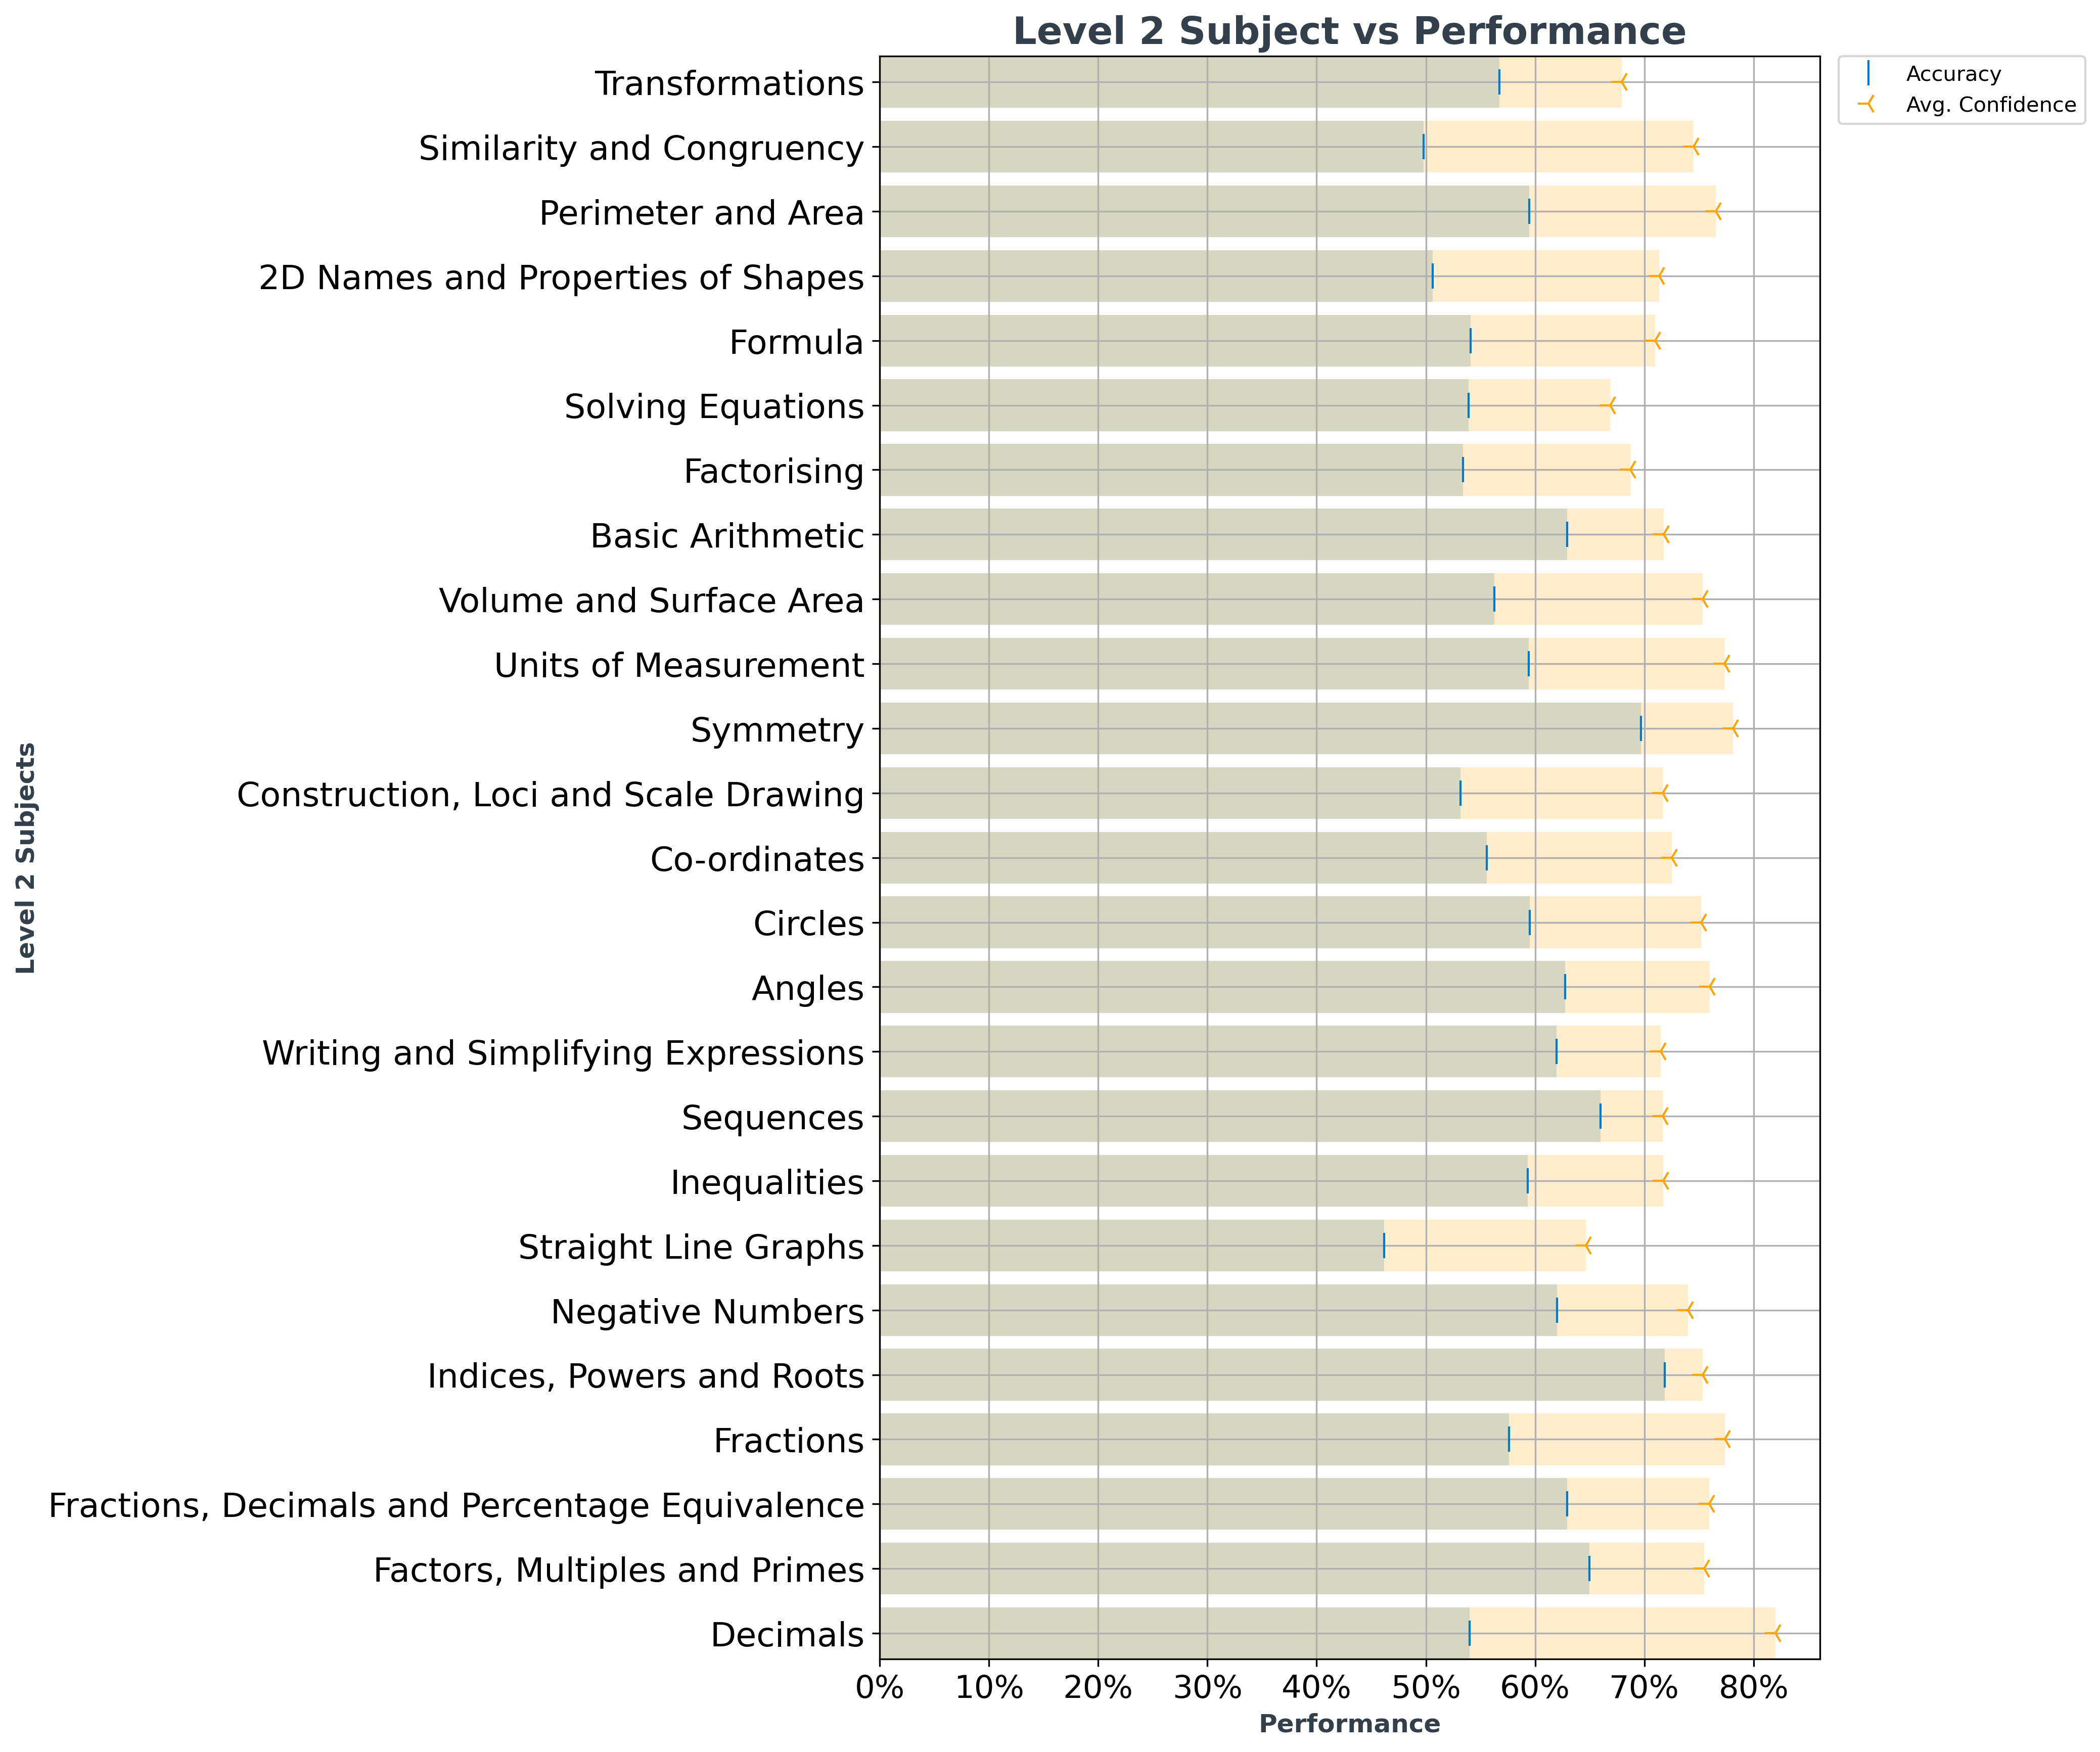

In [42]:
fig, ax = plt.subplots(figsize=(8, 14))
y_pos = range(len(subjectDf['QuestionId']))
ax.barh(y_pos, subjectDf['Accuracy%'], color='#007acc', alpha=0.2, linewidth=3)
ax.plot(subjectDf['Accuracy%'], y_pos, "|", markersize=12, color='#007acc', label = 'Accuracy')
ax.barh(y_pos, subjectDf['Avg. Confidence'], color='orange', alpha=0.2, linewidth=3)
ax.plot(subjectDf['Avg. Confidence'], y_pos, "3", markersize=10, color='orange', label = 'Avg. Confidence')
plt.title('Level 2 Subject vs Performance', fontsize=18 , fontweight='black', color = '#333F4B')
ax.set_xlabel('Performance', fontsize=12, fontweight='black', color = '#333F4B')
ax.set_ylabel('Level 2 Subjects', fontsize=12, fontweight='black', color = '#333F4B')
ax.set_yticks(y_pos)
plt.yticks(fontsize=16)
plt.xticks(fontsize=15)
x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
ax.set_xticklabels(x_value)
_ = ax.set_yticklabels(subjectDf['Name'])
ax.margins(y=0)
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

<ipython-input-43-08640d395177>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_value)


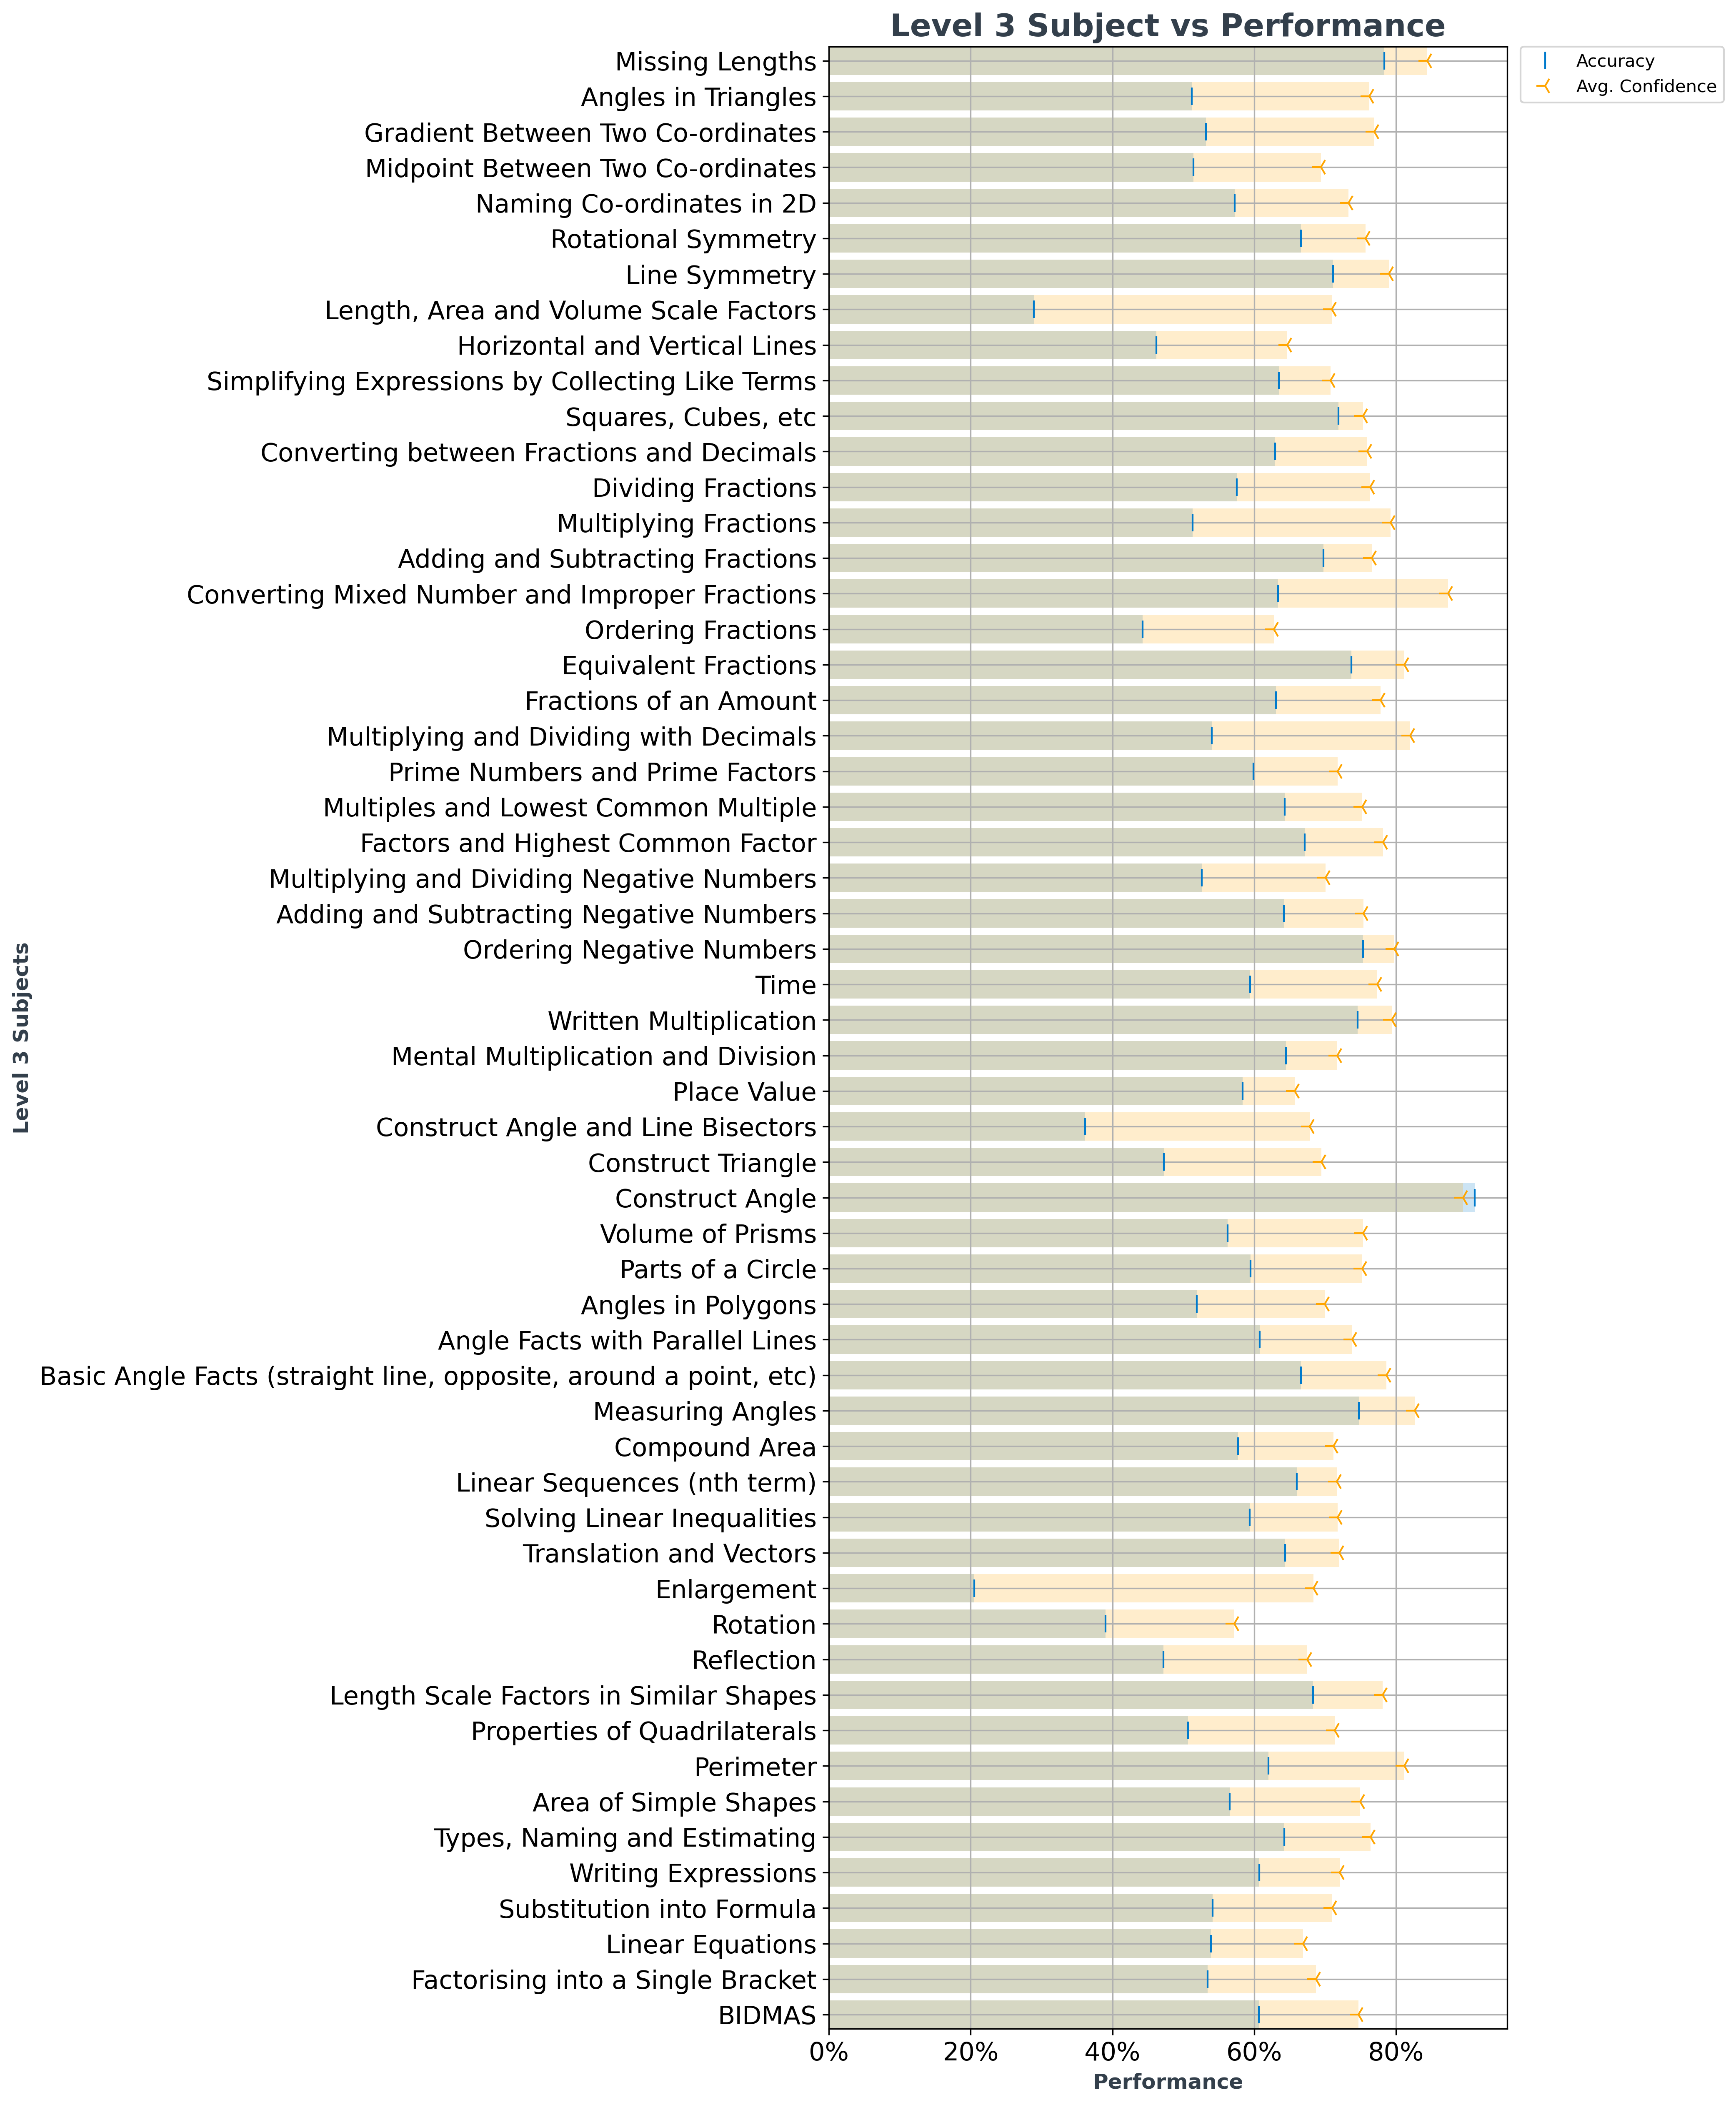

In [43]:
levelToCheckSubjects3 = subjectFile.loc[subjectFile['Level'] == 3]
levelToCheckSubjectsList3 = list(levelToCheckSubjects3['SubjectId'])

subjectList3 = [(x, (getQuestionAcc(x)[0] * 100), (subjectMetadataIndexed.at[x, 'Name']), getQuestionAcc(x)[1]) for x in
               levelToCheckSubjectsList3]
subjectDf3 = pd.DataFrame(subjectList3, columns=['QuestionId', 'Accuracy%', 'Name', 'Avg. Confidence'])
subjectDf3 = subjectDf3.loc[subjectDf3['Accuracy%'] != -100]
subjectDf3 = subjectDf3[subjectDf3['Avg. Confidence'].notna()]

fig, ax = plt.subplots(figsize=(7, 21))
y_pos = range(len(subjectDf3['QuestionId']))
ax.barh(y_pos, subjectDf3['Accuracy%'], color='#007acc', alpha=0.2, linewidth=3)
ax.plot(subjectDf3['Accuracy%'], y_pos, "|", markersize=10, color='#007acc', label = 'Accuracy')
ax.barh(y_pos, subjectDf3['Avg. Confidence'], color='orange', alpha=0.2, linewidth=3)
ax.plot(subjectDf3['Avg. Confidence'], y_pos, "3", markersize=10, color='orange', label = 'Avg. Confidence')
plt.title('Level 3 Subject vs Performance', fontsize=18 , fontweight='black', color = '#333F4B')
ax.set_xlabel('Performance', fontsize=12, fontweight='black', color = '#333F4B')
ax.set_ylabel('Level 3 Subjects', fontsize=12, fontweight='black', color = '#333F4B')
ax.set_yticks(y_pos)
plt.yticks(fontsize=14.5)
plt.xticks(fontsize=14.5)
x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
ax.set_xticklabels(x_value)
_ = ax.set_yticklabels(subjectDf3['Name'])
ax.margins(y=0)
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [44]:
mergedAnswerFileDate = task3_4File.merge(answerMetadataFile, how = 'left', on = 'AnswerId')
mergedAnswerFileDate = mergedAnswerFileDate[mergedAnswerFileDate['DateAnswered'].notna()]
# print(len(mergedAnswerFileDate))
mergedAnswerFileDate = mergedAnswerFileDate.dropna()
# print(len(mergedAnswerFileDate))

In [45]:
answerdf = pd.read_csv(answerMetadataPath)
answerdf['DateAnswered'] = pd.to_datetime(answerdf['DateAnswered'])
answerdf['Month Answered'] = answerdf['DateAnswered'].dt.year
answerdf['Year Answered'] = answerdf['DateAnswered'].dt.month
answerdf['DateAnswered'] = answerdf['DateAnswered'].dt.to_period('M')
# df['year'] = df['ArrivalDate'].dt.year
# df['month'] = df['ArrivalDate'].dt.month
answerdf
merdgeDate = task3_4File.merge(answerdf, how = 'left', on = 'AnswerId')
merdgeDate = merdgeDate[merdgeDate['DateAnswered'].notna()]
merdgeDate

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,Month Answered,Year Answered
0,898,2111,280203,1,2,2,2019-12,NaN,95,86,52562.0,2019,12
1,767,3062,55638,1,3,3,2019-10,25.0,115,39,52562.0,2019,10
2,165,1156,386475,1,2,2,2019-10,NaN,101,39,52562.0,2019,10
3,490,1653,997498,1,4,4,2020-02,NaN,46,115,52562.0,2020,2
4,298,3912,578636,1,3,3,2019-12,NaN,314,78,52562.0,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2,2019-11,NaN,270,65,52562.0,2019,11
1382723,707,2549,584230,0,2,1,2020-01,NaN,269,109,52562.0,2020,1
1382724,840,5901,1138956,1,1,1,2020-01,NaN,270,66,52562.0,2020,1
1382725,794,3854,1151183,0,1,3,2019-12,NaN,339,9,52562.0,2019,12


In [46]:
def sortMonthYear(arr):
    for i in range(0, len(arr)):
        for j in range(i+1, len(arr)):
            if arr[i] > arr[j]:
                temp = arr[i]
                arr[i] = arr[j]
                arr[j] = temp

In [47]:
uniqueMonthYear = merdgeDate['DateAnswered'].unique()
sortMonthYear(uniqueMonthYear)
uniqueMonthYear

<PeriodArray>
['2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
 '2020-04', '2020-05']
Length: 9, dtype: period[M]

In [48]:
ud2 = uniqueMonthYear[0:8]
ud2

<PeriodArray>
['2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
 '2020-04']
Length: 8, dtype: period[M]

In [49]:
def getCorrectAnswerPercentByDate2(date):
    totSubmissions = len(merdgeDate.loc[merdgeDate['DateAnswered'] == date])
    if (totSubmissions != 0):
        noOfCorrect = len(merdgeDate.loc[(merdgeDate['DateAnswered'] == date) & (merdgeDate['IsCorrect'] == 1)])
        avgConfidence =  merdgeDate.loc[(merdgeDate['DateAnswered']== date)]['Confidence'].mean()
        accuracy = noOfCorrect / totSubmissions
        return (totSubmissions, accuracy, avgConfidence)
    return (-1,-1,-1)

In [50]:
getCorrectAnswerPercentByDate2('2020-05')

(48, 0.3958333333333333, nan)

In [51]:
uniqueDates = mergedAnswerFileDate['DateAnswered'].unique()
uniqueDates.sort()
uniqueDates

array([datetime.date(2019, 9, 6), datetime.date(2019, 9, 7),
       datetime.date(2019, 9, 8), datetime.date(2019, 9, 9),
       datetime.date(2019, 9, 10), datetime.date(2019, 9, 11),
       datetime.date(2019, 9, 12), datetime.date(2019, 9, 13),
       datetime.date(2019, 9, 14), datetime.date(2019, 9, 15),
       datetime.date(2019, 9, 16), datetime.date(2019, 9, 17),
       datetime.date(2019, 9, 18), datetime.date(2019, 9, 19),
       datetime.date(2019, 9, 20), datetime.date(2019, 9, 21),
       datetime.date(2019, 9, 22), datetime.date(2019, 9, 23),
       datetime.date(2019, 9, 24), datetime.date(2019, 9, 25),
       datetime.date(2019, 9, 26), datetime.date(2019, 9, 27),
       datetime.date(2019, 9, 28), datetime.date(2019, 9, 29),
       datetime.date(2019, 9, 30), datetime.date(2019, 10, 1),
       datetime.date(2019, 10, 2), datetime.date(2019, 10, 3),
       datetime.date(2019, 10, 4), datetime.date(2019, 10, 5),
       datetime.date(2019, 10, 6), datetime.date(2019, 10, 

In [52]:
dateAccList = [(x,(getCorrectAnswerPercentByDate2(x)[1]) * 100, getCorrectAnswerPercentByDate2(x)[0], getCorrectAnswerPercentByDate2(x)[2]) for x in uniqueMonthYear]
dateMonthDf = pd.DataFrame(dateAccList, columns = ['Date', 'Accuracy', 'No. of Submissions','Avg.Confidence'])
dateMonthDf['Date'] = dateMonthDf['Date'].dt.strftime('%m/%Y')
dateMonthDf = dateMonthDf.dropna()

<ipython-input-53-78cf13dfb34f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


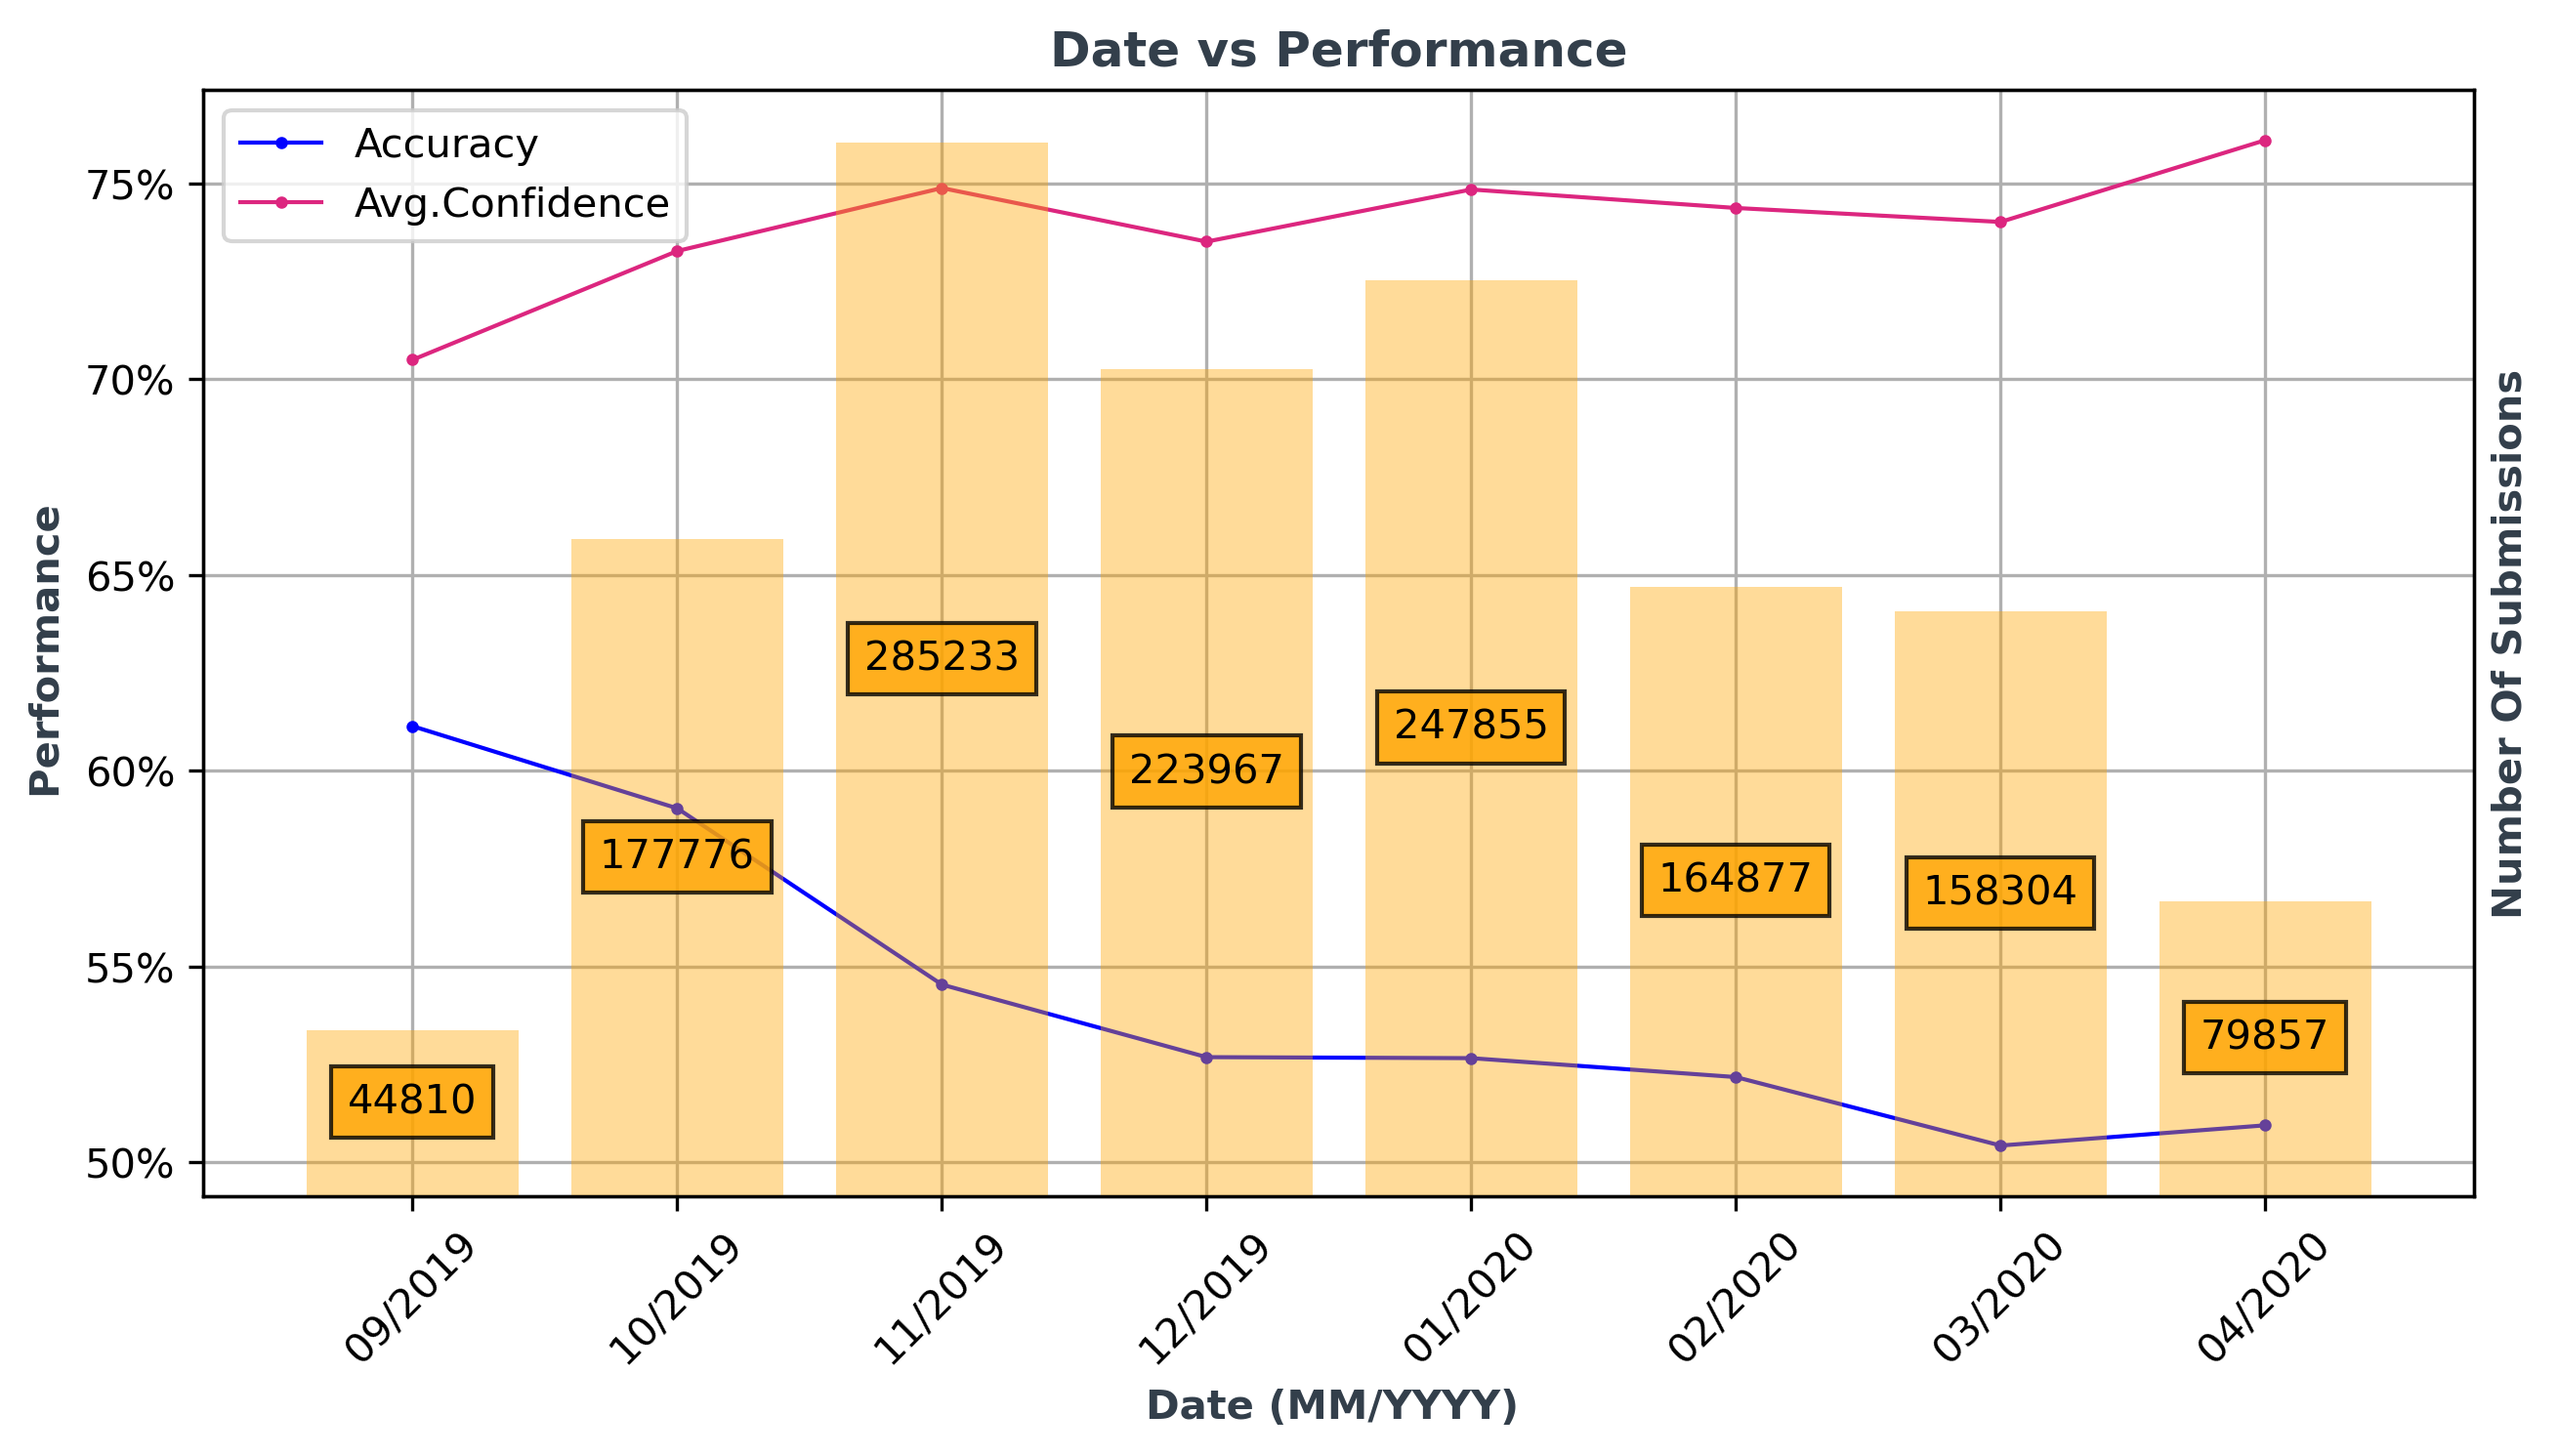

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(dateMonthDf['Date'], dateMonthDf['Accuracy'], c = 'blue' , linewidth = 1, marker="o", markeredgecolor='blue' ,markersize = 2, label = 'Accuracy')
ax.plot(dateMonthDf['Date'], dateMonthDf['Avg.Confidence'], c = '#DC267F' , linewidth = 1, marker="o", markeredgecolor='#DC267F' ,markersize = 2, label = 'Avg.Confidence')
plt.title('Date vs Performance', fontweight='black' , color = '#333F4B')
ax.set_ylabel('Performance ', fontsize=10, fontweight='black', color = '#333F4B')
ax.set_xlabel('Date (MM/YYYY) ', fontsize=10, fontweight='black', color = '#333F4B')
ax2 = ax.twinx()
ax2.bar(dateMonthDf['Date'], dateMonthDf['No. of Submissions'], color = 'orange', alpha = 0.4)
def valuelabel(x, y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i], ha = 'center',
                 bbox = dict(facecolor = 'orange', alpha =0.8))
y_value=['{:,.0f}'.format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(y_value)
valuelabel(list(dateMonthDf['Date']), list(dateMonthDf['No. of Submissions']))
ax2.yaxis.set_major_locator(ticker.NullLocator())
ax2.set_ylabel('Number Of Submissions', fontsize=10, fontweight='black', color = '#333F4B')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid()
ax.legend()
plt.show()

In [54]:
mergedDataByUserId = task3_4File.merge(studentMetadataFile, how='left',on='UserId')
mergedDataByUserId = mergedDataByUserId.merge(answerMetadataFile, how='left', on='AnswerId')
# mergedDataByUserId = mergedDataByUserId[mergedDataByUserId['DateOfBirth'].notna()]
# mergedDataByUserId = mergedDataByUserId[mergedDataByUserId['DateAnswered'].notna()]
mergedDataByUserId = mergedDataByUserId.dropna()
mergedDataByUserId['Age'] = pd.to_datetime(mergedDataByUserId['DateAnswered']).dt.year - pd.to_datetime(mergedDataByUserId['DateOfBirth']).dt.year

In [55]:
def getAnsweredPercent(confidenceValue,dataframe,text):
    totSubmissions = len(dataframe.loc[(dataframe[text] == confidenceValue)])
    noOfCorrect = len(dataframe.loc[(dataframe[text] == confidenceValue) & (dataframe['IsCorrect'] == 1)])
    if totSubmissions == 0:
        return 0
    return noOfCorrect / totSubmissions

In [56]:
mergedDataByUserIdDropNaN = mergedDataByUserId[mergedDataByUserId['Confidence'].notna()]
mergedDataByUserIdPremiumPupil = mergedDataByUserIdDropNaN[mergedDataByUserIdDropNaN['PremiumPupil']==1]
mergedDataByUserIdNonPremiumPupil = mergedDataByUserIdDropNaN[mergedDataByUserIdDropNaN['PremiumPupil']==0]
confidenceValue = mergedDataByUserIdDropNaN['Confidence'].unique()
confidenceValue.sort()
print(confidenceValue)

confidencePremium = [(x,getAnsweredPercent(x,mergedDataByUserIdPremiumPupil,'Confidence')) for x in confidenceValue]
confidenceNonPremium = [(x,getAnsweredPercent(x,mergedDataByUserIdNonPremiumPupil,'Confidence')) for x in confidenceValue]
confidencePremiumDf = pd.DataFrame(confidencePremium, columns = ['ConfidenceValue', 'PremiumAccuracy-%' ])
confidenceNonPremiumDf = pd.DataFrame(confidenceNonPremium, columns = ['ConfidenceValue', 'NonPremiumAccuracy-%' ])
confidenceDF = confidencePremiumDf.merge(confidenceNonPremiumDf,how='inner',on='ConfidenceValue')
confidenceDF

[  0.  25.  50.  75. 100.]


,ConfidenceValue,PremiumAccuracy-%,NonPremiumAccuracy-%
0,0.0,0.316769,0.342785
1,25.0,0.344896,0.378491
2,50.0,0.422615,0.484322
3,75.0,0.572790,0.647404
4,100.0,0.643218,0.732771


<ipython-input-57-947791e1ecf7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


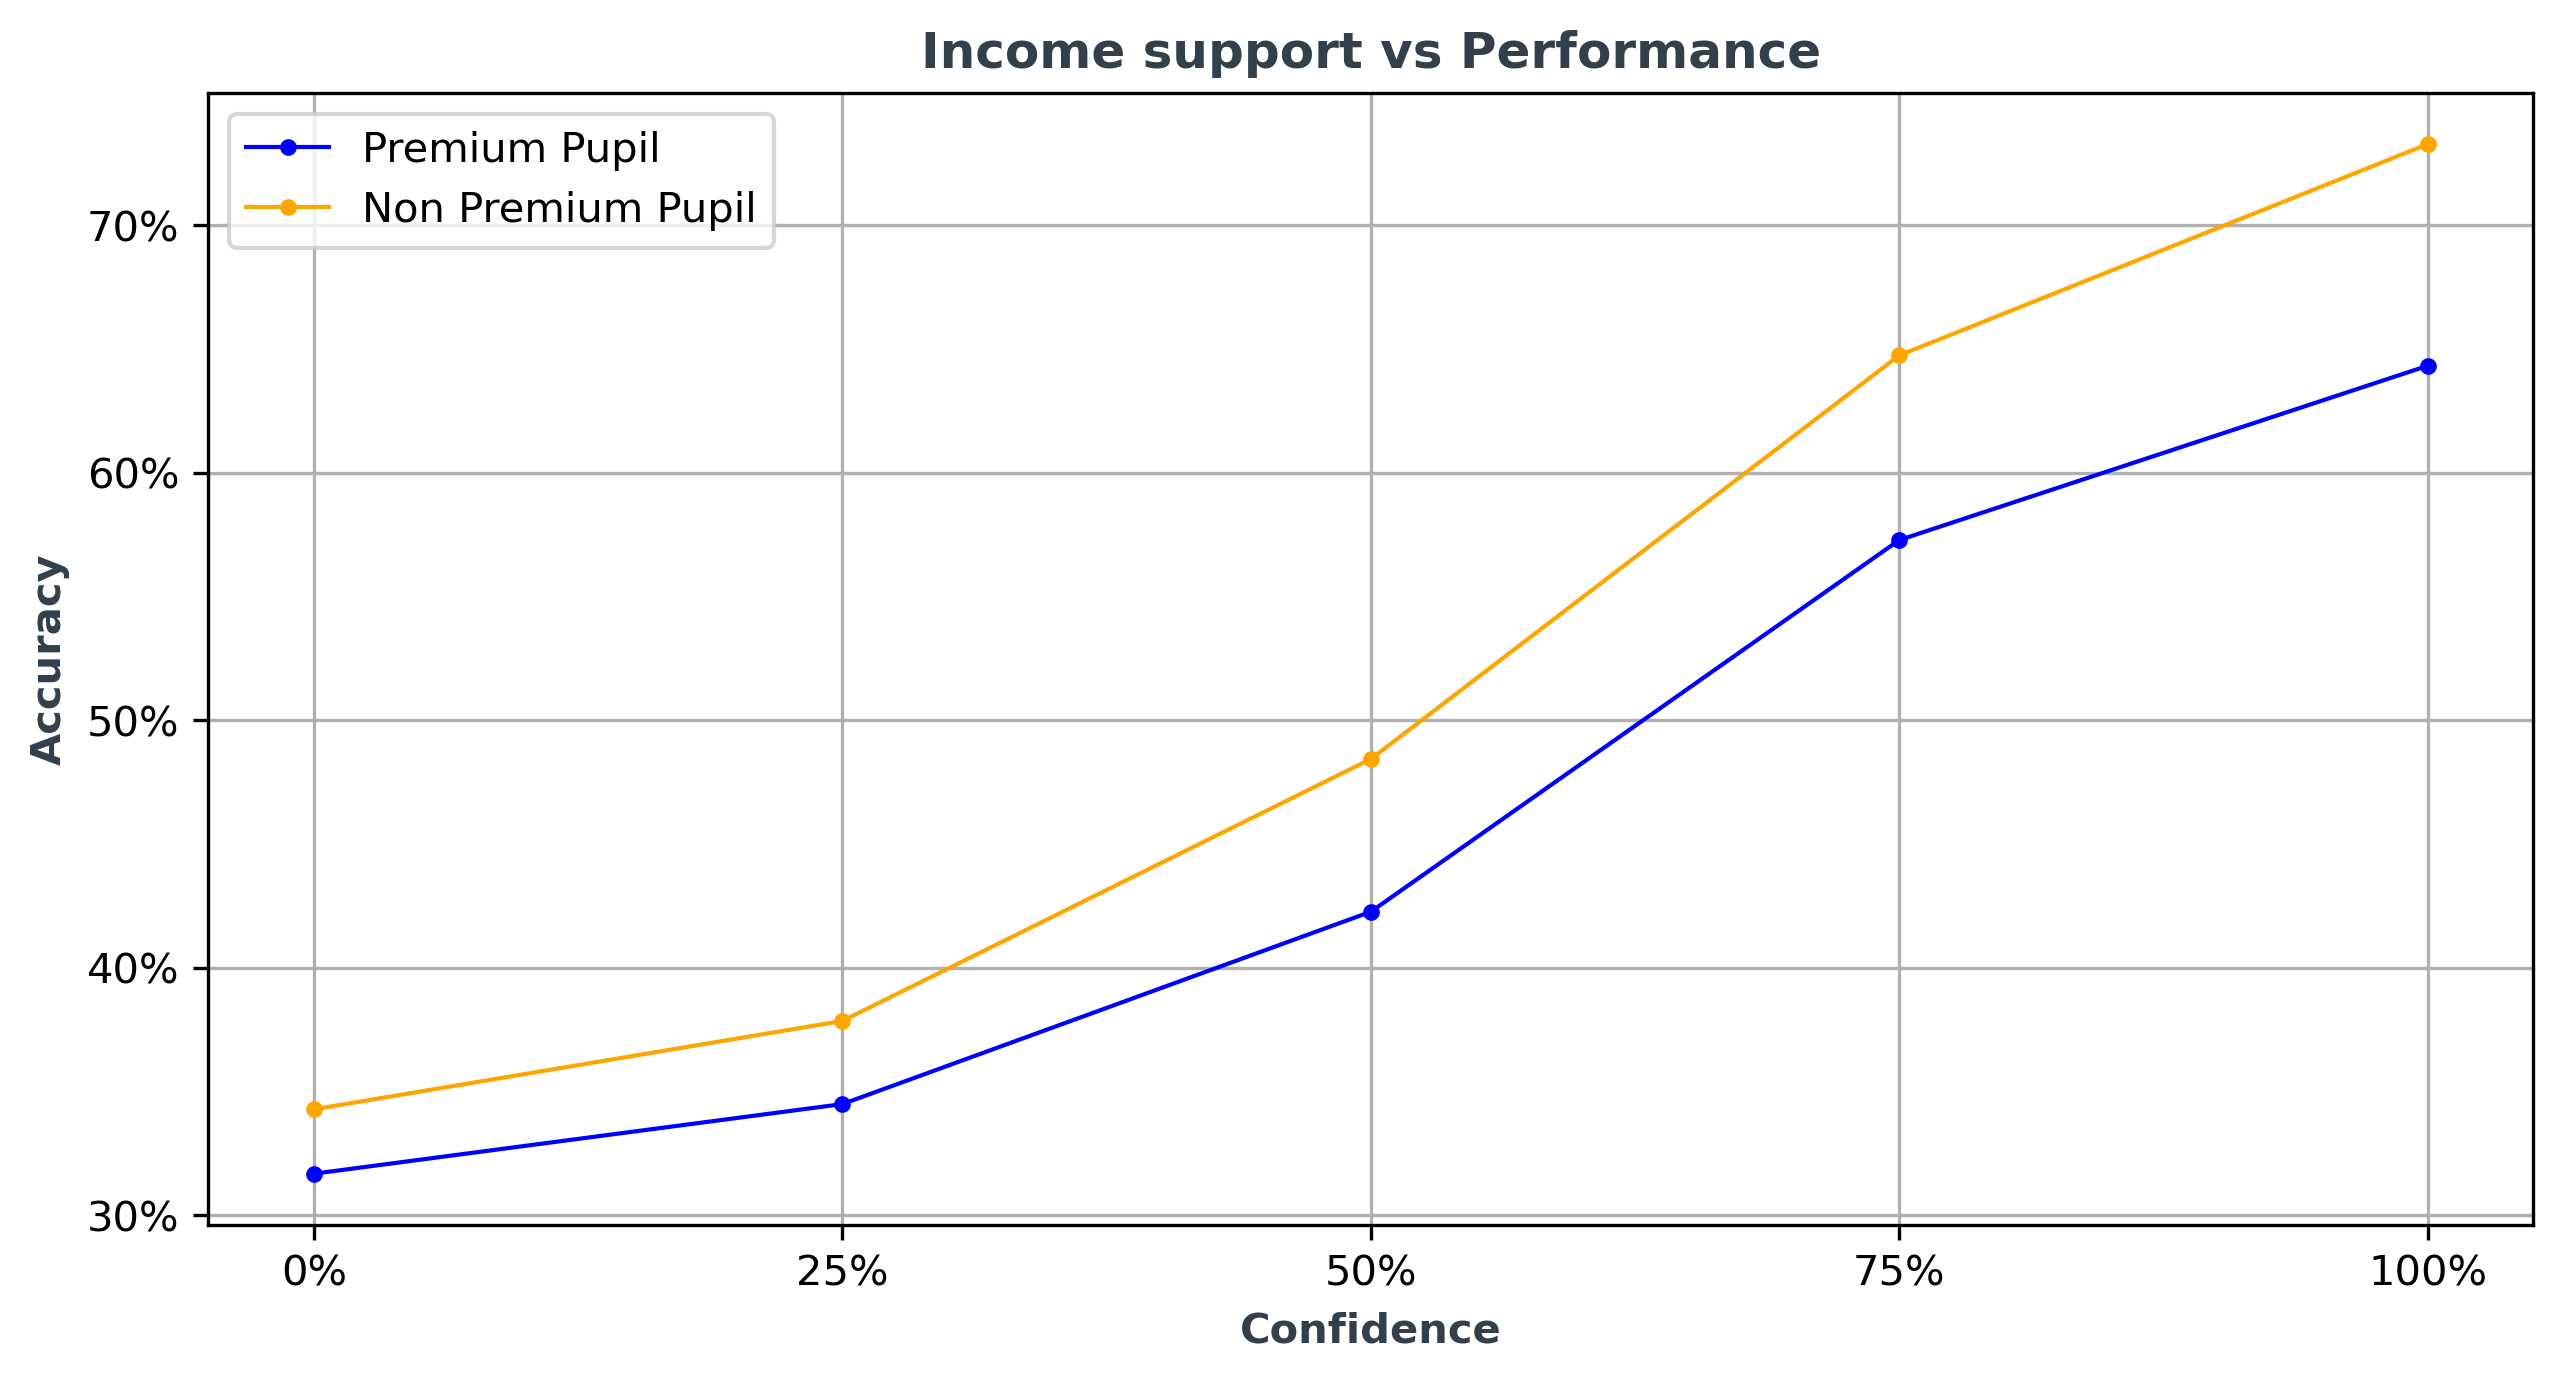

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))
x1 = confidenceDF["ConfidenceValue"]
y1 = confidenceDF["PremiumAccuracy-%"]
ax.plot(x1, y1, marker='o', color='b', linewidth = 1, markeredgecolor='b' ,markersize = 3, label = "Premium Pupil")
x2 = confidenceDF["ConfidenceValue"]
y2 = confidenceDF["NonPremiumAccuracy-%"]
ax.plot(x2, y2,  marker='o', color='orange', linewidth = 1, markeredgecolor='orange' ,markersize = 3 , label = "Non Premium Pupil")
plt.xticks(np.arange(min(confidenceDF["ConfidenceValue"]), max(confidenceDF["ConfidenceValue"])+1, 25.0))
plt.xlabel('Confidence',fontsize=10, fontweight='black', color = '#333F4B')
plt.ylabel('Accuracy',fontsize=10, fontweight='black', color = '#333F4B')
y_value=['{:,.0f}'.format(y*100) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(y_value)
x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
ax.set_xticklabels(x_value)
plt.title('Income support vs Performance', fontweight='black', color = '#333F4B')
plt.legend()
plt.grid()
plt.show()

In [58]:
# Copy of above visualisation
# x1 = confidenceDF["ConfidenceValue"]
# y1 = confidenceDF["PremiumAccuracy-%"]
# plt.plot(x1, y1, marker='o', color='b', label = "Premium Pupil")
# x2 = confidenceDF["ConfidenceValue"]
# y2 = confidenceDF["NonPremiumAccuracy-%"]
# plt.plot(x2, y2,  marker='o', color='orange',label = "Non Premium Pupil")
# plt.xticks(np.arange(min(confidenceDF["ConfidenceValue"]), max(confidenceDF["ConfidenceValue"])+1, 25.0))
# plt.xlabel('Confidence %')
# plt.ylabel('Accuracy %')
# plt.title('Confidence % vs Accuracy %')
# plt.legend()
# plt.grid()
# plt.show()

In [59]:
mergedDataByUserIdCopy = mergedDataByUserIdDropNaN.copy()
mergedDataByUserIdCopy['DateAnswered'] = pd.to_datetime(mergedDataByUserIdCopy['DateAnswered']).dt.to_period('m')
mergedDataByUserIdCopy
userIdValue = mergedDataByUserIdCopy['UserId'].unique()
userIdValue.sort()
print(userIdValue)
accuracyPerUserId = [(x,getAnsweredPercent(x,mergedDataByUserIdCopy,'UserId')) for x in userIdValue]
accuracyPerUserIdDf = pd.DataFrame(accuracyPerUserId,columns=['UserId','Accuracy-%'])
accuracyPerUserIdDf = accuracyPerUserIdDf.merge(studentMetadataFile, how='left' , on='UserId')
accuracyPerUserIdDf

[   3    5   10 ... 6131 6140 6142]


,UserId,Accuracy-%,Gender,DateOfBirth,PremiumPupil
0,3,1.000000,1,2008-05-01 00:00:00.000,0.0
1,5,0.591837,1,2008-06-01 00:00:00.000,0.0
2,10,0.474934,1,2008-02-01 00:00:00.000,1.0
3,16,0.482759,2,2007-09-01 00:00:00.000,0.0
4,17,0.913043,2,2007-11-01 00:00:00.000,0.0
...,...,...,...,...,...
1855,6125,0.642857,1,2008-04-01 00:00:00.000,1.0
1856,6129,0.545455,2,2008-03-01 00:00:00.000,0.0
1857,6131,0.434783,2,2007-11-01 00:00:00.000,0.0
1858,6140,0.563694,2,2008-03-01 00:00:00.000,0.0


In [60]:
# #Age vs Accuracy vs Confidence
# df1 = mergedDataByUserIdDropNaN.copy()
# df1 = df1.groupby(['Age']).mean()
# df1 = df1.reset_index()
# fig,ax1  = plt.subplots(figsize=(10, 5))
# x1 = df1['Age']
# y1 = df1['IsCorrect']
# x2 = df1['Age']
# y2 = df1['Confidence']/100
# y_value=['{:,.0f}'.format(y*100) + '%' for y in ax1.get_yticks()]
# ax1.set_yticklabels(y_value)
# ax1 .set_xlabel('Age', fontweight='black', color = '#333F4B')
# ax1 .set_ylabel('Accuracy', fontweight='black', color = '#333F4B')
# ax2=ax1 .twinx()
# plot_1 = ax1.plot(x1, y1, marker='o', color='b', label = 'Accuracy')
# plot_2 = ax2.plot(x2, y2,  marker='o', color='orange', label = 'Confidence')
# ax2.set_ylabel('Confidence', fontweight='black', color = '#333F4B')
# # y_val = np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks()))
# # ax2.set_yticks( y_val)
# # y_value2=['{:,.0f}'.format(y*100) + '%' for y in ax2.get_yticks()]
# # ax2.set_yticklabels(y_value2)
# plt.title('Affect of Age on Performance along with Perception', fontweight='black', color = '#333F4B')
# plt.legend()
# plt.xticks(np.arange(min(x1), max(x1)+1, 1.0))
# # ax1.grid()
# plt.show()

In [61]:
def getAccuracyByAge(age):
    totSubmissions = len(mergedDataByUserIdDropNaN.loc[mergedDataByUserIdDropNaN['Age'] == age])
    noOfCorrect = len(mergedDataByUserIdDropNaN.loc[(mergedDataByUserIdDropNaN['Age'] == age) & (mergedDataByUserIdDropNaN['IsCorrect'] == 1)])
    avgConfidence =  mergedDataByUserIdDropNaN.loc[mergedDataByUserIdDropNaN['Age'] == age]['Confidence'].mean()
    accuracy = (noOfCorrect / totSubmissions)
    print(totSubmissions)
    return (accuracy, avgConfidence)

In [62]:
getAccuracyByAge(11)

82833


(0.6078978185022877, 72.63892410029818)

In [63]:
getAccuracyByAge(12)

78686


(0.6007040642553949, 73.00377449609842)

In [64]:
getAccuracyByAge(13)

14787


(0.5913302224927302, 75.3989991208494)

In [65]:
getAccuracyByAge(14)

7


(0.42857142857142855, 50.0)

In [66]:
df1 = mergedDataByUserIdDropNaN.copy()
ageList = df1['Age'].unique()
relevantDataList = [(x, getAccuracyByAge(x)[0], getAccuracyByAge(x)[1]) for x in ageList]
agePerformanceDf = pd.DataFrame(relevantDataList,columns=['Age','Accuracy%','Avg.Confidence'])
agePerformanceDf

82833
82833
78686
78686
14787
14787
7
7


,Age,Accuracy%,Avg.Confidence
0,11,0.607898,72.638924
1,12,0.600704,73.003774
2,13,0.591330,75.398999
3,14,0.428571,50.000000


<ipython-input-67-6b4115c617e1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_value)


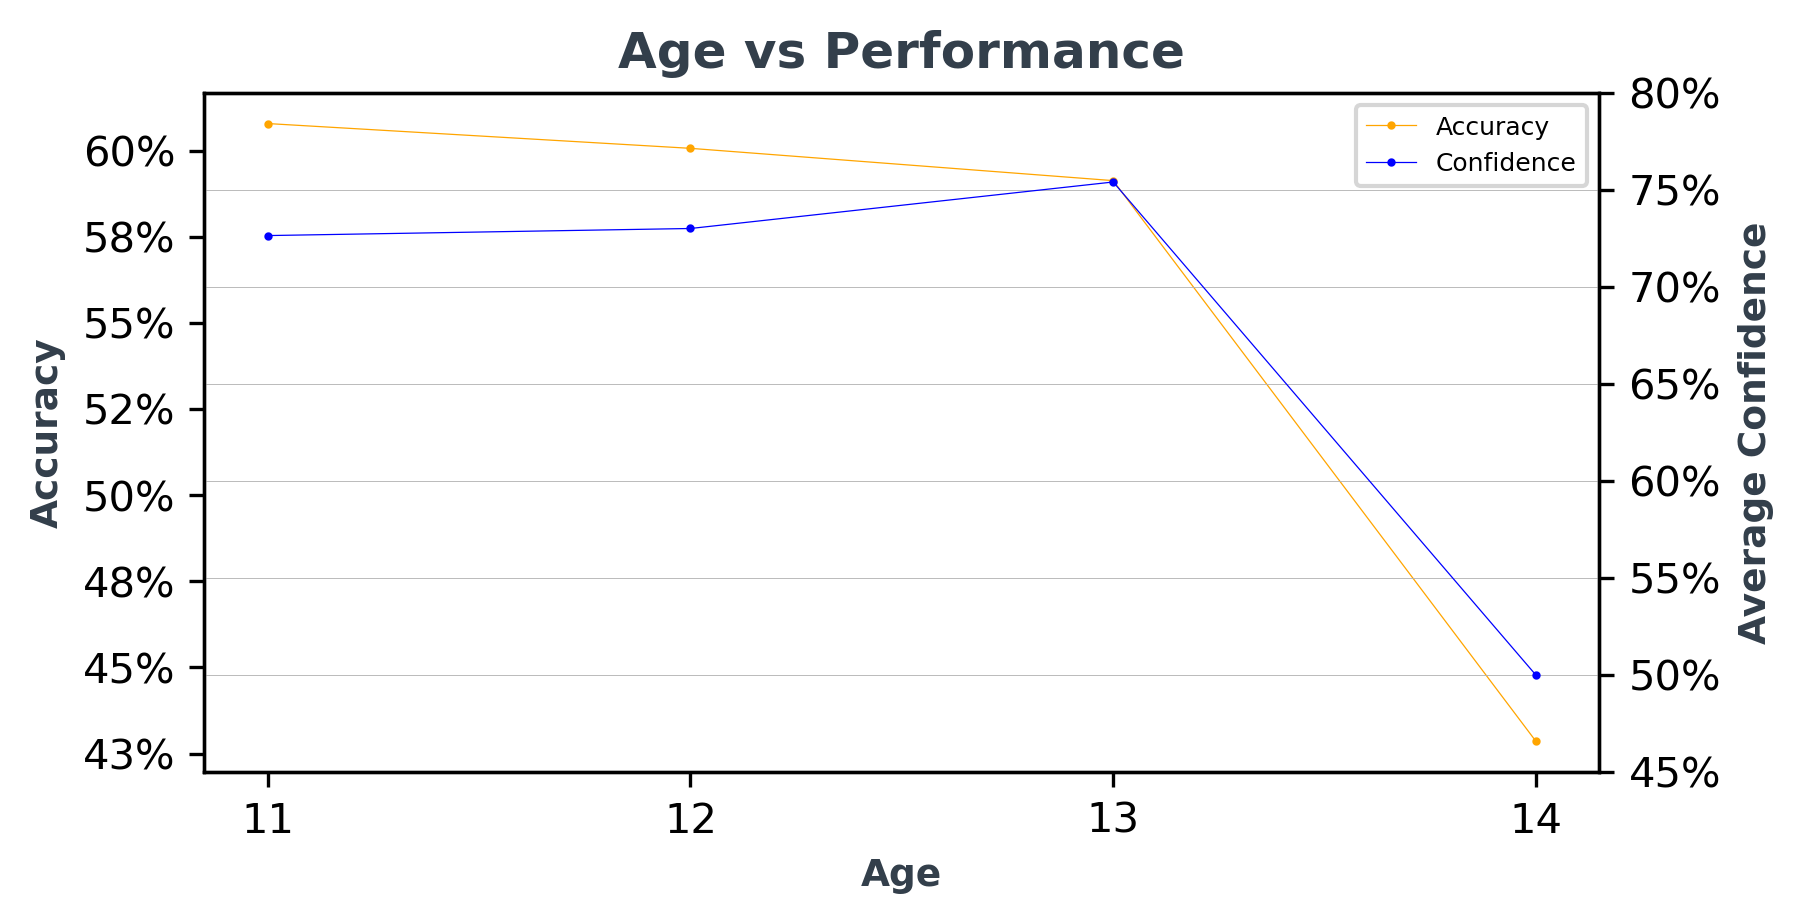

In [67]:
fig, ax1 = plt.subplots(figsize=(6, 3))
lns1 = ax1.plot(agePerformanceDf['Age'], agePerformanceDf['Accuracy%'], color='orange', linewidth = 0.3, marker="o", markeredgecolor='orange' ,markersize =1, label='Accuracy')
# , linestyle = 'dashed', label="Original Data"
ax1.set_title('Age vs Performance', fontweight='black', color = '#333F4B')
ax1.set_ylabel('Accuracy', fontsize= 9 , fontweight='black', color = '#333F4B')
ax1.set_xlabel('Age',  fontsize= 9, fontweight='black', color = '#333F4B')
# y_value=['{:,.2f}'.format((y*100)) + '%' for y in ax.get_yticks()]
# ax.set_yticklabels(y_value)
# ax.set_ylim(bottom=0)
# a, b = np.polyfit(quizDf['QuizID'], quizDf['Accuracy-%'], 1)
# plt.plot(quizDf['QuizID'], a*quizDf['QuizID']+b, linewidth = 0.3, color="blue",label="Line of Best Fit")
ax2 = ax1.twinx()
lns2 = ax2.plot(agePerformanceDf['Age'], agePerformanceDf['Avg.Confidence'], color='blue', linewidth = 0.3, marker="o", markeredgecolor='blue' ,markersize =1, label='Confidence')
y_val = np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax2.get_yticks()))
ax2.set_yticks(y_val)
y_value=['{:,.0f}%'.format(y) for y in ax2.get_yticks()]
ax2.set_yticklabels(y_value)
y_value=['{:,.0f}%'.format(y*100) for y in ax1.get_yticks()]
ax1.set_yticklabels(y_value)
# ax2.bar(quizDf['QuizID'], quizDf['No. Of Submissions'], color = 'grey', alpha = 0.3)
ax2.set_ylabel('Average Confidence', fontsize= 9 , fontweight='black', color = '#333F4B')
lns = lns1+lns2
labs = ['Accuracy','Confidence']
plt.legend(lns, labs, loc =0,fontsize = '6')
x1 = agePerformanceDf['Age']
plt.xticks(np.arange(min(x1), max(x1)+1, 1.0))
plt.grid(linewidth=0.2)
plt.show()

In [68]:
import statsmodels.api as sm
feature_cols = ['Age', 'Gender', 'PremiumPupil']
X = mergedDataByUserIdDropNaN[feature_cols]
y = mergedDataByUserIdDropNaN['IsCorrect']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

logreg = LogisticRegression().fit(X_train,y_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Training set score: 0.603
Test set score: 0.604
Optimization terminated successfully.
         Current function value: 0.668222
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              IsCorrect   No. Observations:               176313
Model:                          Logit   Df Residuals:                   176310
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                0.005111
Time:                        11:19:03   Log-Likelihood:            -1.1782e+05
converged:                       True   LL-Null:                   -1.1842e+05
Covariance Type:            nonrobust   LLR p-value:                1.342e-263
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0309      0.001     23.139      0.000